In [111]:
import os
import pandas as pd
from glob import glob

#WSL PATH FOR ALL CSVS IN FOLDER
csv_folder = "/mnt/c/Users/txn/OneDrive - Oak Ridge National Laboratory/Desktop/CSVS TO COMBINE"
#GETTING ALL CSVS IN FOLDER
csv_files = glob(os.path.join(csv_folder, "*.csv"))
print(f"Found {len(csv_files)} CSV files.")


# READ AND CONCAT
dfs = [pd.read_csv(f) for f in csv_files]
combined_df = pd.concat(dfs, ignore_index=True)

# SAVE THE CSV
combined_df.to_csv("combined.csv", index=False)
print("Combined CSV saved as combined.csv")

Found 18 CSV files.
Combined CSV saved as combined.csv


In [45]:
pd.read_csv('combined.csv').head()

,query_id,query,expected_code,generated_code,status,result_df_text,Model_Config,overall_tokens,time_taken_seconds,full_agent_output,...,R_score,input_tokens,output_tokens,query_type,data_type,prov_type,error,regex_match_score,summary_text,summary_tokens
0,1,"For each workflow execution, for each hostname...","result = df.groupby(['workflow_id', 'hostname'...","result = df.groupby(['workflow_execution_id', ...",405,NaN,70B|HC|BL|100,299,1.6449,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,0.0,265.0,34.0,OLTP,ControlFlow|Scheduling,Retrospective,Exception during execution: 'workflow_executio...,NaN,NaN,NaN
1,2,For each activity in the last workflow execute...,result = df[df.workflow_id == df.loc[df.ended_...,result = df[df['workflow_id'] == df['workflow_...,405,NaN,70B|HC|BL|100,299,1.6049,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,0.0,263.0,36.0,OLTP,DataFlow,Retrospective,Exception during execution: 'Column not found:...,NaN,NaN,NaN
2,3,What is the execution time per task in the fir...,result = df[df.workflow_id == df.loc[df.starte...,result = df[(df['workflow_execution_id'] == df...,405,NaN,70B|HC|BL|100,319,1.8524,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,0.0,261.0,58.0,OLTP,Telemetry,Retrospective,Exception during execution: 'workflow_executio...,NaN,NaN,NaN
3,4,What is the duration of each workflow execution?,result=df.groupby('workflow_id').agg(first=('s...,result = df.groupby('workflow_id')['timestamp'...,405,NaN,70B|HC|BL|100,294,2.6218,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,0.0,257.0,37.0,OLAP,Telemetry,Retrospective,Exception during execution: 'Column not found:...,NaN,NaN,NaN
4,5,What is the longest workflow execution?,result = df.groupby('workflow_id').agg(first=(...,result = df.groupby('workflow_id')['end_time']...,405,NaN,70B|HC|BL|100,279,1.4835,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,0.0,255.0,24.0,OLAP,Telemetry,Retrospective,Exception during execution: 'Column not found:...,NaN,NaN,NaN


In [83]:
df = pd.read_csv("combined.csv")
print(type(df))
print(df.columns) 

<class 'pandas.core.frame.DataFrame'>
Index(['query_id', 'query', 'expected_code', 'generated_code', 'status',
       'result_df_text', 'Model_Config', 'overall_tokens',
       'time_taken_seconds', 'full_agent_output', 'L_score', 'L_reason',
       'R_score', 'input_tokens', 'output_tokens', 'query_type', 'data_type',
       'prov_type', 'error', 'regex_match_score', 'summary_text',
       'summary_tokens'],
      dtype='object')


In [19]:
print(f"Rows with 8B model: {len(df_8b)}")

NameError: name 'df_8b' is not defined

In [10]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

cols_to_use = ['L_score', 'overall_tokens', 'time_taken_seconds']
# DROP MISSING 
df_filtered = df_8b.dropna(subset=cols_to_use)

if df_filtered.empty:
    print("No data available after filtering nulls in specified columns.")
else:
    scatter_matrix(df_filtered[cols_to_use], alpha=0.5, figsize=(10,10), diagonal='kde')
    plt.suptitle("Scatter matrix for 8B model")
    plt.show()


NameError: name 'df_8b' is not defined

In [53]:
data_type_counts = df['data_type'].value_counts()
print(data_type_counts)

data_type
Telemetry                                    126
DataFlow                                      63
Scheduling                                    63
ControlFlow|Scheduling                        42
DataFlow|ControlFlow                          42
DataFlow|ControlFlow|Scheduling|Telemetry     42
Scheduling|Telemetry                          21
ControlFlow                                   21
Name: count, dtype: int64


In [20]:
avg_lscore_per_model = df.groupby('Model_Config')['L_score'].mean().reset_index()
print(avg_lscore_per_model)


                  Model_Config  L_score
0     70B|HC|BL-FS-DYS-EXV|100   0.6475
1         70B|HC|BL-FS-DYS|100   0.6400
2         70B|HC|BL-FS-QGL|100   0.8750
3             70B|HC|BL-FS|100   0.1850
4                70B|HC|BL|100   0.0750
5                 70B|HC|F|100   0.8650
6                70B|HC|ZS|100   0.0000
7      8B|HC|BL-FS-DYS-EXV|100   0.5450
8          8B|HC|BL-FS-DYS|100   0.5475
9          8B|HC|BL-FS-QGL|100   0.6825
10             8B|HC|BL-FS|100   0.1900
11                8B|HC|BL|100   0.0650
12                 8B|HC|F|100   0.7600
13                8B|HC|ZS|100   0.0000
14  GPT-4|HC|BL-FS-DYS-EXV|100   0.6825
15      GPT-4|HC|BL-FS-DYS|100   0.6375
16      GPT-4|HC|BL-FS-QGL|100   0.8775
17          GPT-4|HC|BL-FS|100   0.2100
18             GPT-4|HC|BL|100   0.0700
19              GPT-4|HC|F|100   0.9500
20             GPT-4|HC|ZS|100   0.0000


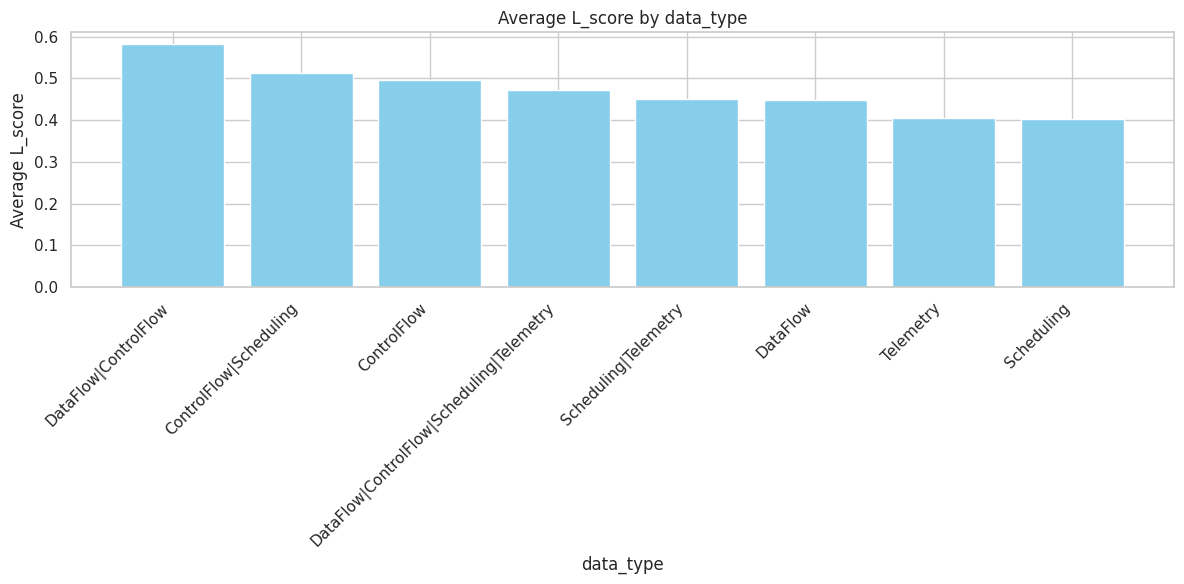

In [51]:
avg_lscore_per_model = df.groupby('data_type')['L_score'].mean().reset_index()

# SORTED BY AVG L_score
avg_lscore_per_model = avg_lscore_per_model.sort_values(by='L_score', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(avg_lscore_per_model['data_type'], avg_lscore_per_model['L_score'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('data_type')
plt.ylabel('Average L_score')
plt.title('Average L_score by data_type')
plt.tight_layout()
plt.show()


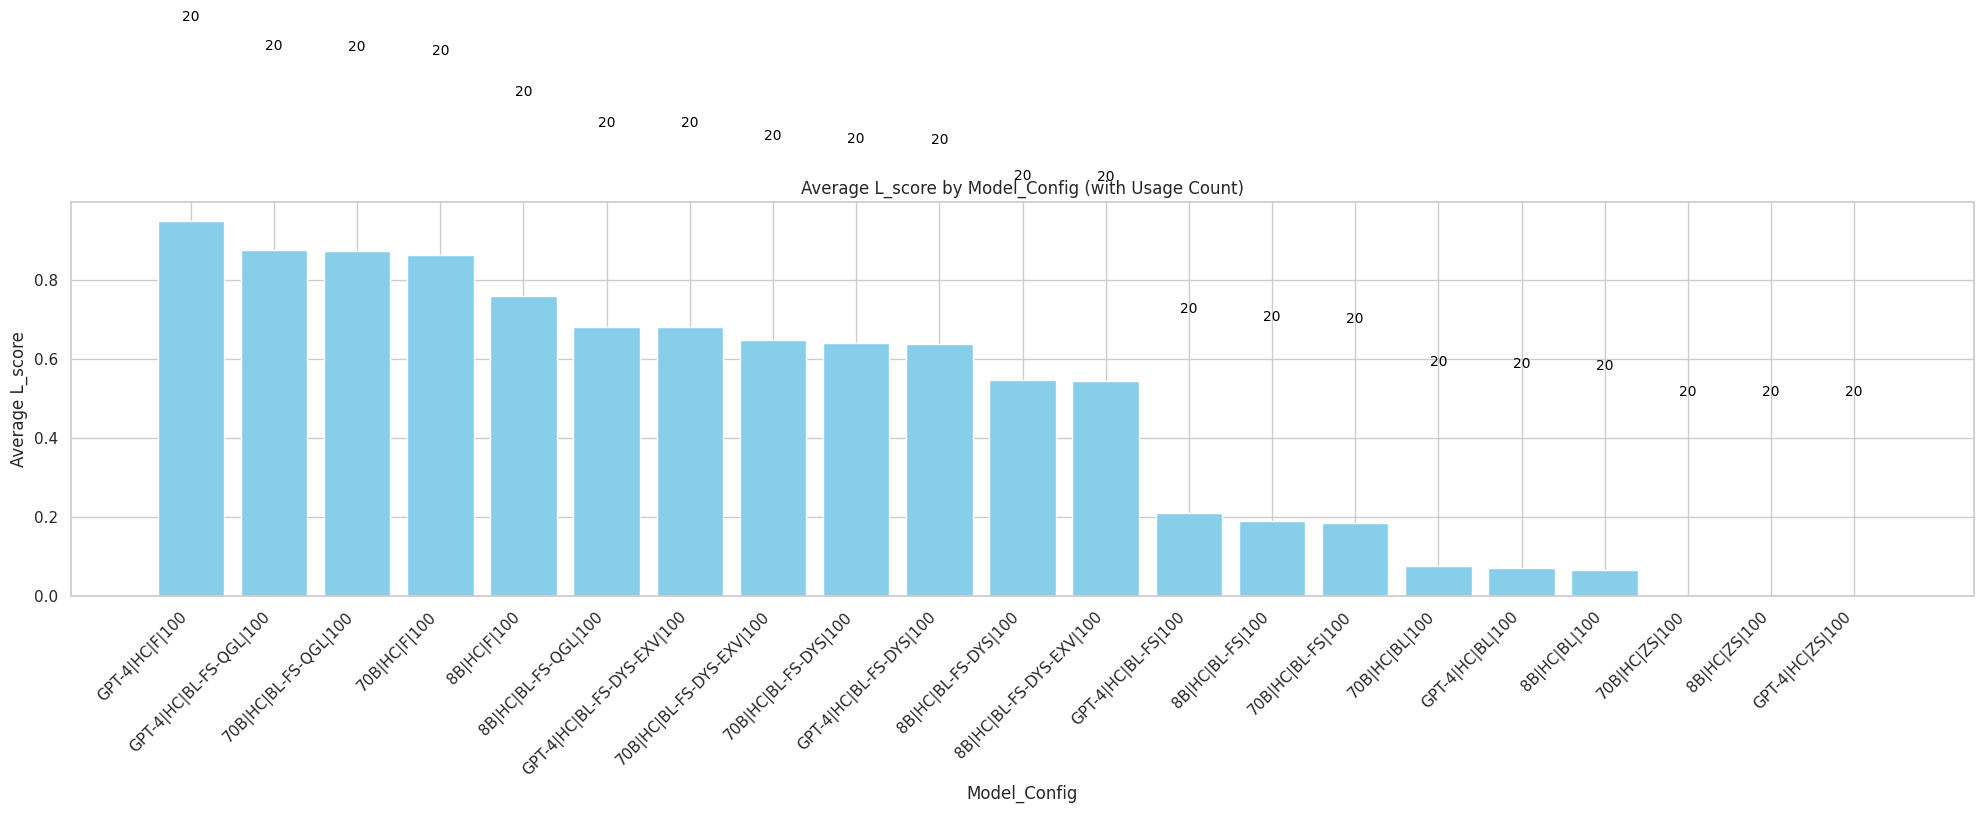

In [40]:
model_stats = df.groupby('Model_Config')['L_score'].agg(['mean', 'count']).reset_index()

# Sort by average L_score
model_stats = model_stats.sort_values(by='mean', ascending=False)

# Plot
plt.figure(figsize=(20, 10))
bars = plt.bar(model_stats['Model_Config'], model_stats['mean'], color='skyblue')

# Annotate each bar with the count
for bar, count in zip(bars, model_stats['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(count),
             ha='center', va='bottom', fontsize=10, color='black')

# Labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model_Config')
plt.ylabel('Average L_score')
plt.title('Average L_score by Model_Config (with Usage Count)')
plt.tight_layout()
plt.show()


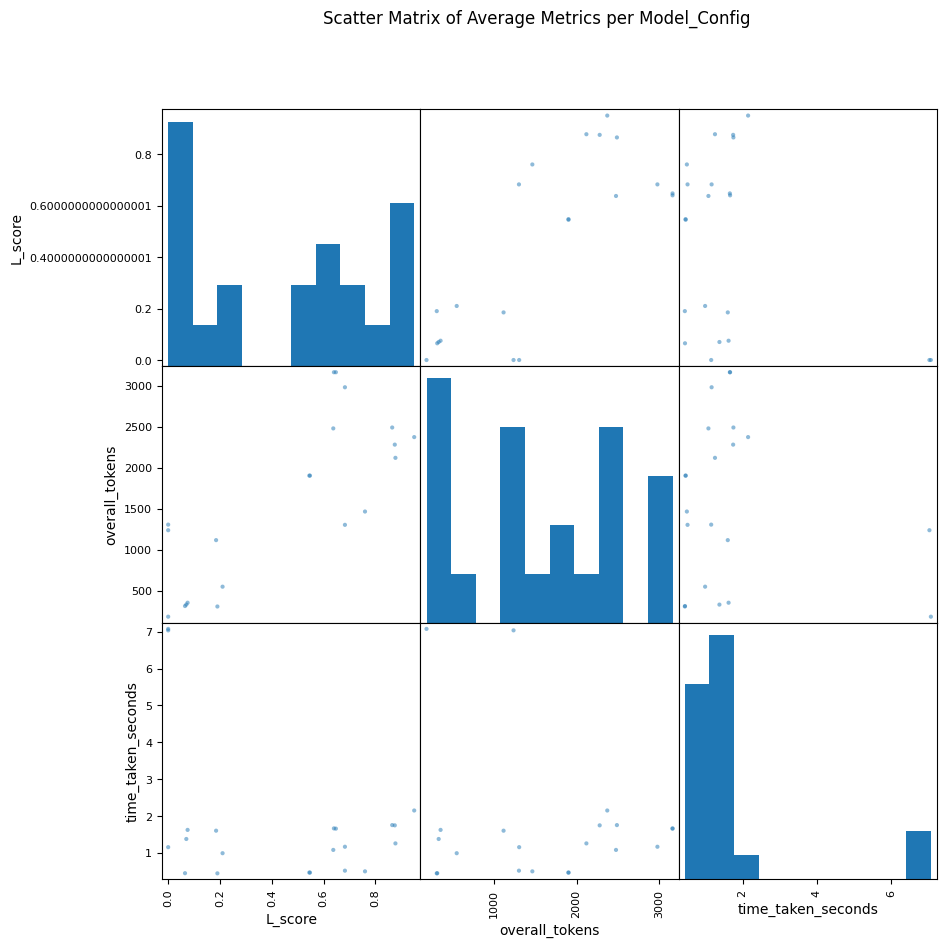

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Convert relevant columns to numeric if needed
df['L_score'] = pd.to_numeric(df['L_score'], errors='coerce')
df['overall_tokens'] = pd.to_numeric(df['overall_tokens'], errors='coerce')
df['time_taken_seconds'] = pd.to_numeric(df['time_taken_seconds'], errors='coerce')

# AGG
agg_df = df.groupby('Model_Config').agg({
    'L_score': 'mean',
    'overall_tokens': 'mean',
    'time_taken_seconds': 'mean'
}).reset_index()

scatter_matrix(agg_df[['L_score', 'overall_tokens', 'time_taken_seconds']], alpha=0.5, figsize=(10,10), diagonal='hist')
plt.suptitle("Scatter Matrix of Average Metrics per Model_Config")
plt.show()


In [13]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


# 8B ANOVA GRAPHS AND DATA

In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# FILTER BY 8B
df_8b = df[df['Model_Config'].str.contains('8B')]

# ANOVA FUNCTION
def run_anova(dependent_var, data, group_var='Model_Config'):
    print(f"\nANOVA for {dependent_var} by {group_var}:")
    formula = f'{dependent_var} ~ C({group_var})'
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA
    print(anova_table)

# RUN ANOVA ON THESE 3 COLUMNS
for col in ['L_score', 'overall_tokens', 'time_taken_seconds']:
    run_anova(col, df_8b)



ANOVA for L_score by Model_Config:
                    sum_sq     df          F        PR(>F)
C(Model_Config)  11.369964    6.0  24.141786  3.409277e-19
Residual         10.439750  133.0        NaN           NaN

ANOVA for overall_tokens by Model_Config:
                       sum_sq     df         F    PR(>F)
C(Model_Config)  5.320080e+07    6.0  1.721803  0.120619
Residual         6.849124e+08  133.0       NaN       NaN

ANOVA for time_taken_seconds by Model_Config:
                   sum_sq     df          F        PR(>F)
C(Model_Config)  8.042553    6.0  96.266207  6.167379e-46
Residual         1.851912  133.0        NaN           NaN


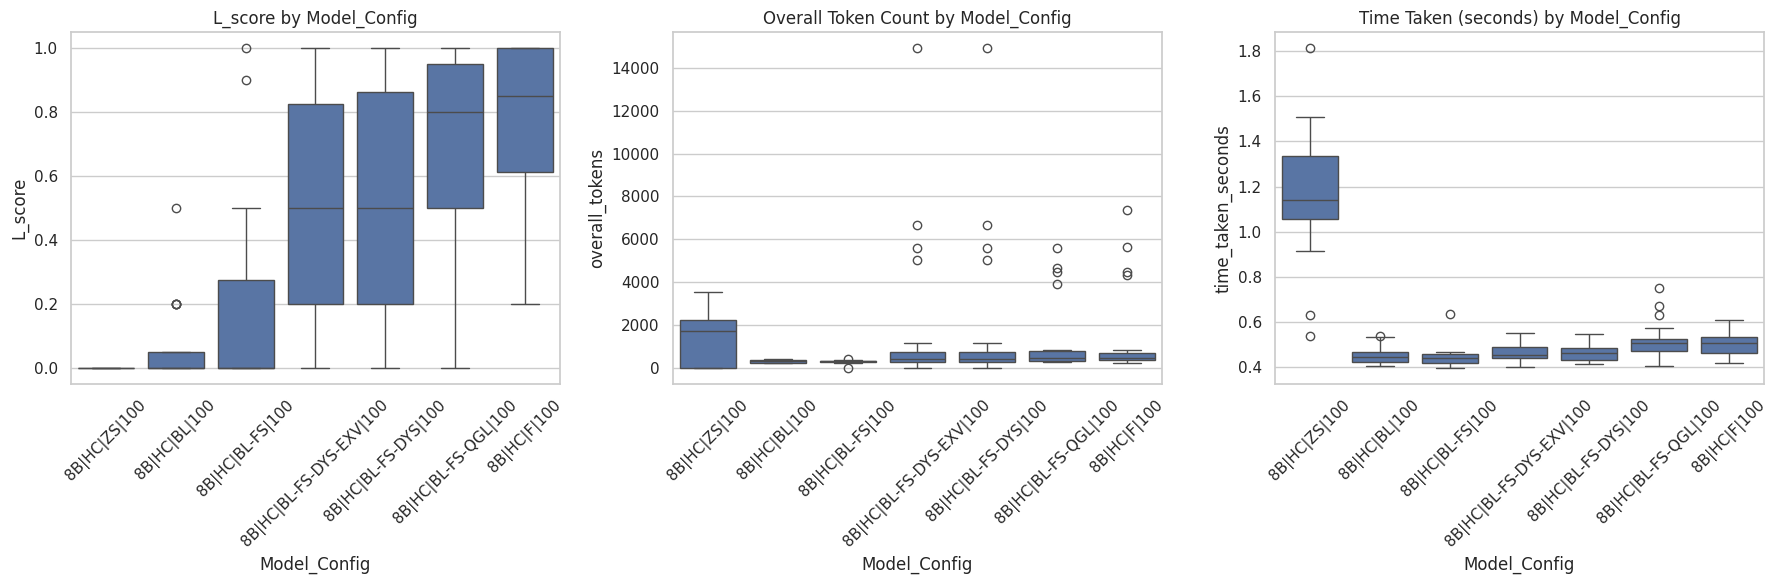

In [22]:
# FILTER to 8B 
df_8b = df[df['Model_Config'].str.contains('8B')]
# Plot STYLE
sns.set(style="whitegrid")
# BOXPLOTS PER VARIABLE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Model_Config', y='L_score', data=df_8b, ax=axes[0])
axes[0].set_title('L_score by Model_Config')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Model_Config', y='overall_tokens', data=df_8b, ax=axes[1])
axes[1].set_title('Overall Token Count by Model_Config')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(x='Model_Config', y='time_taken_seconds', data=df_8b, ax=axes[2])
axes[2].set_title('Time Taken (seconds) by Model_Config')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 70B ANOVA GRAPHS AND DATA

In [24]:
# FILTER BY 70B
df_8b = df[df['Model_Config'].str.contains('70B')]

# ANOVA FUNCTION
def run_anova(dependent_var, data, group_var='Model_Config'):
    print(f"\nANOVA for {dependent_var} by {group_var}:")
    formula = f'{dependent_var} ~ C({group_var})'
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA
    print(anova_table)

# RUN ANOVA ON THESE 3 COLUMNS
for col in ['L_score', 'overall_tokens', 'time_taken_seconds']:
    run_anova(col, df_8b)



ANOVA for L_score by Model_Config:
                    sum_sq     df          F        PR(>F)
C(Model_Config)  16.772107    6.0  42.555603  1.149408e-28
Residual          8.736375  133.0        NaN           NaN

ANOVA for overall_tokens by Model_Config:
                       sum_sq     df         F    PR(>F)
C(Model_Config)  1.417345e+08    6.0  1.990314  0.071365
Residual         1.578536e+09  133.0       NaN       NaN

ANOVA for time_taken_seconds by Model_Config:
                     sum_sq     df           F        PR(>F)
C(Model_Config)  493.397464    6.0  160.556884  2.153524e-58
Residual          68.119017  133.0         NaN           NaN


In [25]:
# FILTER to 70B 
df_8b = df[df['Model_Config'].str.contains('70B')]
# Plot STYLE
sns.set(style="whitegrid")
# BOXPLOTS PER VARIABLE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Model_Config', y='L_score', data=df_8b, ax=axes[0])
axes[0].set_title('L_score by Model_Config')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Model_Config', y='overall_tokens', data=df_8b, ax=axes[1])
axes[1].set_title('Overall Token Count by Model_Config')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(x='Model_Config', y='time_taken_seconds', data=df_8b, ax=axes[2])
axes[2].set_title('Time Taken (seconds) by Model_Config')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined

# GPT-4 ANOVA GRAPHS AND DATA

In [ ]:
# FILTER BY GPT
df_8b = df[df['Model_Config'].str.contains('GPT')]

# ANOVA FUNCTION
def run_anova(dependent_var, data, group_var='Model_Config'):
    print(f"\nANOVA for {dependent_var} by {group_var}:")
    formula = f'{dependent_var} ~ C({group_var})'
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA
    print(anova_table)

# RUN ANOVA ON THESE 3 COLUMNS
for col in ['L_score', 'overall_tokens', 'time_taken_seconds']:
    run_anova(col, df_8b)


In [ ]:
# FILTER to GPT 
df_8b = df[df['Model_Config'].str.contains('GPT')]
# Plot STYLE
sns.set(style="whitegrid")
# BOXPLOTS PER VARIABLE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Model_Config', y='L_score', data=df_8b, ax=axes[0])
axes[0].set_title('L_score by Model_Config')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Model_Config', y='overall_tokens', data=df_8b, ax=axes[1])
axes[1].set_title('Overall Token Count by Model_Config')
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(x='Model_Config', y='time_taken_seconds', data=df_8b, ax=axes[2])
axes[2].set_title('Time Taken (seconds) by Model_Config')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# How each RAG component affects the scores and how query class is affected

In [23]:
df['query_class'] = df['query_type'] + '_' + df['data_type']
#df.head
# Combining the Query Class columns
df['RAG_type'] = df['Model_Config'].str.split('|').str[2] # To get RAG from Model_Configs

In [27]:
# Two-way ANOVA with interaction
formula = 'L_score ~ C(RAG_type) + C(query_class) + C(RAG_type):C(query_class)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                               sum_sq     df           F        PR(>F)
C(RAG_type)                 45.906619    6.0  170.249713  1.006894e-96
C(query_class)               3.469897   13.0    5.939304  6.871014e-10
C(RAG_type):C(query_class)   8.659770   78.0    2.470439  1.582067e-08
Residual                    14.470833  322.0         NaN           NaN


# TUKEY ON RAG AND ANOVA TESTING

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD for RAG_type
print("Tukey HSD results for RAG_type:")
tukey_rag = pairwise_tukeyhsd(endog=df['L_score'], groups=df['RAG_type'], alpha=0.05)
print(tukey_rag.summary())

# Tukey HSD for query_class
print("\nTukey HSD results for query_class:")
tukey_query = pairwise_tukeyhsd(endog=df['L_score'], groups=df['query_class'], alpha=0.05)
print(tukey_query.summary())


In [ ]:
# RAG_type
tukey_rag.plot_simultaneous(figsize=(10,6))
plt.title('Tukey HSD - RAG_type')
plt.show()

# query_class
tukey_query.plot_simultaneous(figsize=(12,8))
plt.title('Tukey HSD - query_class')
plt.show()


In [ ]:
# TUKEY FOR RAG
fig = tukey_rag.plot_simultaneous(figsize=(10, 6))
plt.title('Tukey HSD: Mean Differences for RAG_type on L_score')
plt.xlabel('Mean difference')
plt.grid(True)
plt.show()


Each horizontal line represents the confidence interval for the mean difference between a pair of groups.

If the line crosses zero, the difference is not significant.

Lines fully to one side of zero indicate significant differences.

This visualization makes it easy to identify which pairs differ significantly at a glance.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot RAG_type Tukey results on the left
tukey_rag.plot_simultaneous(ax=axes[0])
axes[0].set_title('Tukey HSD: RAG_type on L_score')
axes[0].set_xlabel('Mean difference')
axes[0].grid(True)

# Plot query_class Tukey results on the right
tukey_query.plot_simultaneous(ax=axes[1])
axes[1].set_title('Tukey HSD: query_class on L_score')
axes[1].set_xlabel('Mean difference')
axes[1].grid(True)

plt.tight_layout()
plt.show()


# L_score by RAG Type

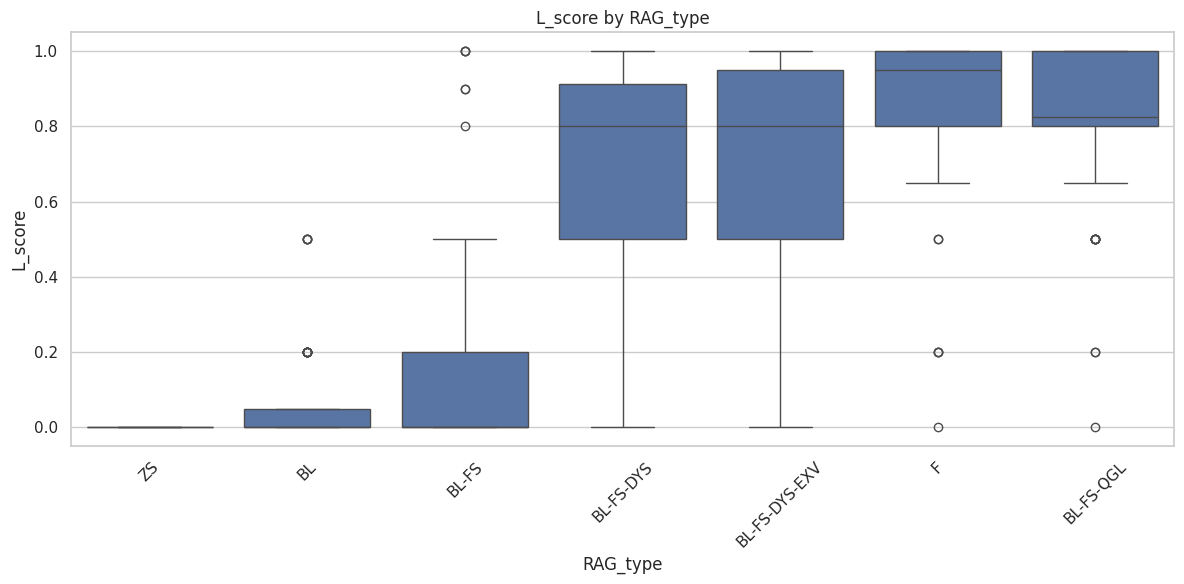

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='RAG_type', y='L_score')
plt.title('L_score by RAG_type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# L_score by Query Class

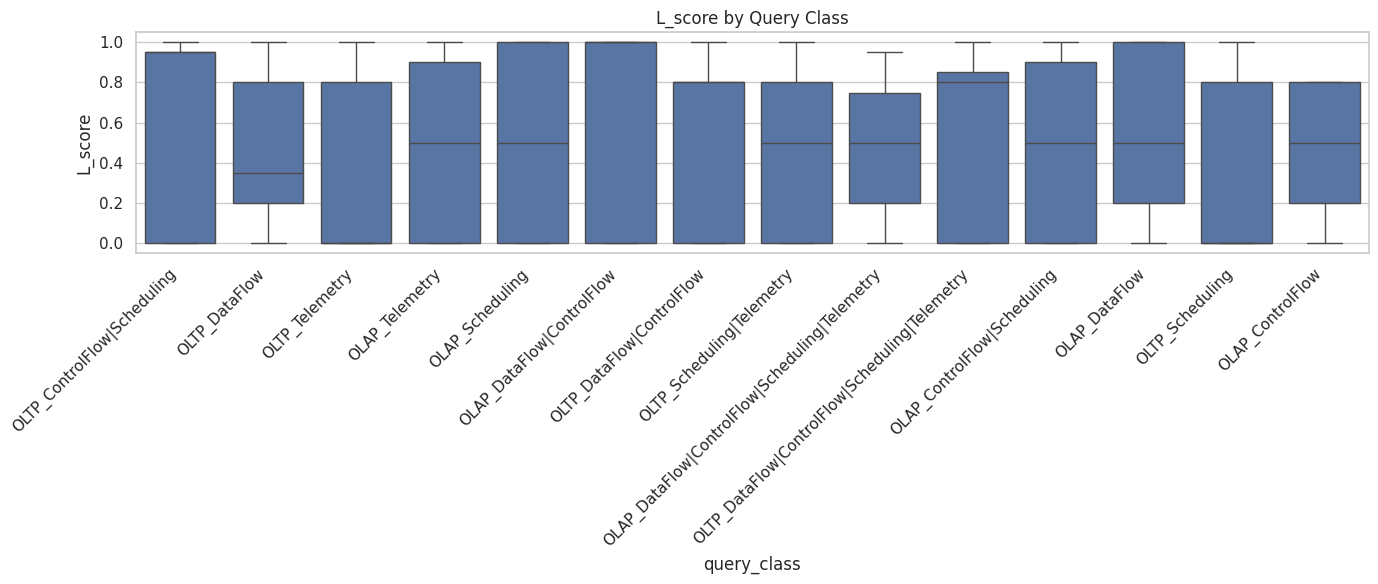

In [27]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='query_class', y='L_score')
plt.title('L_score by Query Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_97990/3815336096.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='RAG_type', y='L_score', estimator='mean', ci='sd')


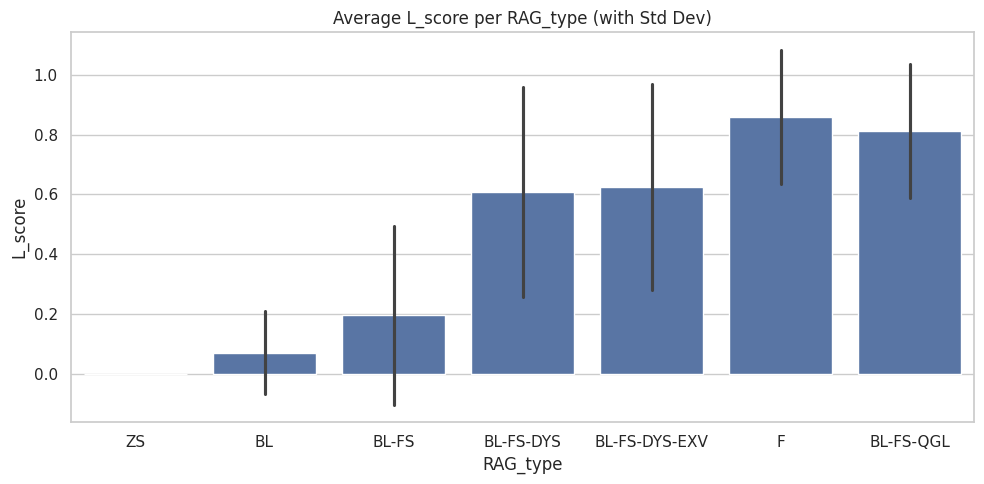

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='RAG_type', y='L_score', estimator='mean', ci='sd')
plt.title('Average L_score per RAG_type (with Std Dev)')
plt.tight_layout()
plt.show()

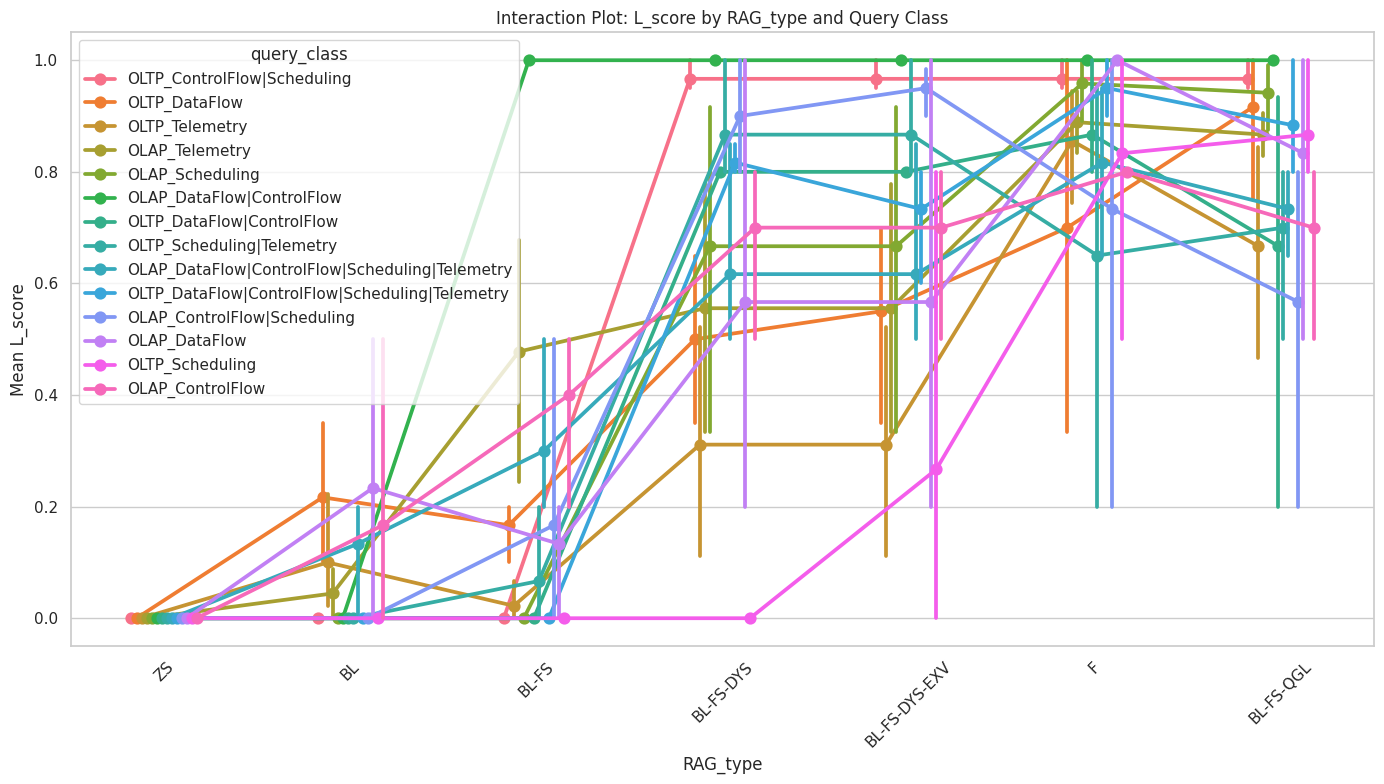

In [26]:
plt.figure(figsize=(14, 8))
sns.pointplot(
    data=df,
    x='RAG_type',
    y='L_score',
    hue='query_class',
    dodge=True,
    markers='o',
    linestyles='-'
)
plt.title('Interaction Plot: L_score by RAG_type and Query Class')
plt.xticks(rotation=45)
plt.ylabel('Mean L_score')
plt.tight_layout()
plt.show()

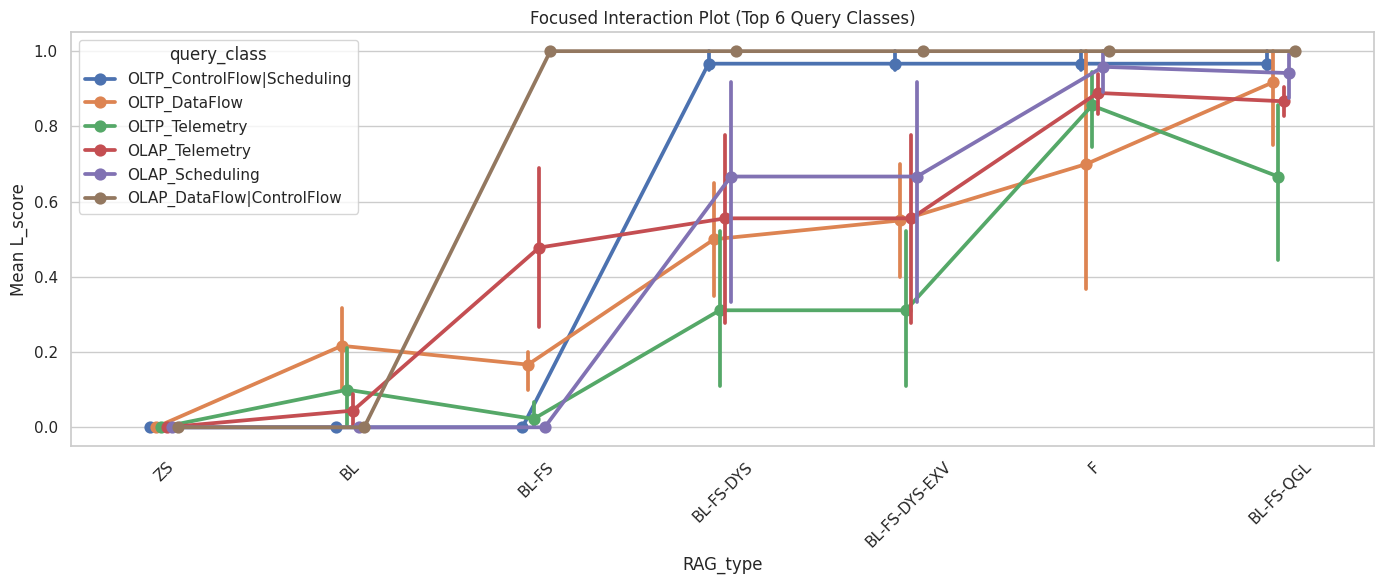

In [25]:
top_classes = df['query_class'].value_counts().nlargest(6).index
subset_df = df[df['query_class'].isin(top_classes)]
plt.figure(figsize=(14, 6))
sns.pointplot(
    data=subset_df,
    x='RAG_type',
    y='L_score',
    hue='query_class',
    dodge=True,
    markers='o',
    linestyles='-'
)
plt.title('Focused Interaction Plot (Top 6 Query Classes)')
plt.xticks(rotation=45)
plt.ylabel('Mean L_score')
plt.tight_layout()
plt.show()

In [ ]:
# Interaction with RAG Type on data type WITH GPT as focus. 

In [78]:
df.head(5)

,query_id,query,expected_code,generated_code,status,summary_text,result_df_text,Model_Config,summary_tokens,overall_tokens,...,L_score,L_reason,R_score,query_type,data_type,prov_type,error,regex_match_score,query_class,RAG_type
0,1,"For each workflow execution, for each hostname...","result = df.groupby(['workflow_id', 'hostname'...","A great question!\n\nTo answer this, I'll assu...",405,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",NaN,70B|HC|ZS|100,2045,4098,...,0.0,The AI assistant generated code does not provi...,0.0,OLTP,OLTP_ControlFlow|Scheduling,Retrospective,Exception during execution: unterminated strin...,NaN,OLTP_ControlFlow|Scheduling,ZS
1,2,For each activity in the last workflow execute...,result = df[df.workflow_id == df.loc[df.ended_...,NaN,ERROR,NaN,NaN,70B|HC|ZS|100,0,0,...,0.0,ERROR: 'NoneType' object has no attribute 'get',0.0,OLTP,OLTP_DataFlow,Retrospective,Failed during processing: 'NoneType' object ha...,0.0,OLTP_DataFlow,ZS
2,3,What is the execution time per task in the fir...,result = df[df.workflow_id == df.loc[df.starte...,To analyze the execution time per task in the ...,405,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",NaN,70B|HC|ZS|100,1300,2608,...,0.0,The AI assistant generated code does not conta...,0.0,OLTP,OLTP_Telemetry,Retrospective,Exception during execution: unterminated strin...,NaN,OLTP_Telemetry,ZS
3,4,What is the duration of each workflow execution?,result=df.groupby('workflow_id').agg(first=('s...,To determine the duration of each workflow exe...,405,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",NaN,70B|HC|ZS|100,1365,2738,...,0.0,The AI assistant generated code does not provi...,0.0,OLAP,OLAP_Telemetry,Retrospective,Exception during execution: unterminated strin...,NaN,OLAP_Telemetry,ZS
4,5,What is the longest workflow execution?,result = df.groupby('workflow_id').agg(first=(...,NaN,ERROR,NaN,NaN,70B|HC|ZS|100,0,0,...,0.0,ERROR: 'NoneType' object has no attribute 'get',0.0,OLAP,OLAP_Telemetry,Retrospective,Failed during processing: 'NoneType' object ha...,0.0,OLAP_Telemetry,ZS


In [79]:
import pandas as pd

# Example: if your df is already loaded
df['data_type'] = df['data_type'].str.replace(r'^(OLTP_|OLAP_)', '', regex=True)


In [118]:
top_by_score = df.groupby("data_type")["L_score"].mean()
print(top_by_score)


data_type
ControlFlow                                  0.577778
ControlFlow|Scheduling                       0.598611
DataFlow                                     0.524074
DataFlow|ControlFlow                         0.677778
DataFlow|ControlFlow|Scheduling|Telemetry    0.550000
Scheduling                                   0.468519
Scheduling|Telemetry                         0.525000
Telemetry                                    0.471296
Name: L_score, dtype: float64


In [81]:
# Step 1: Compute mean L_score per query_class
query_means = df.groupby('data_type')['L_score'].mean()

# Step 2: Identify the best and worst
best_query = query_means.idxmax()
worst_query = query_means.idxmin()

# Step 3: Find the average 3 — closest to the overall mean
overall_mean = query_means.mean()
avg_3_queries = (query_means - overall_mean).abs().sort_values().iloc[:3].index.tolist()

# Step 4: Print results
print(" Best Query Class:", best_query, "->", query_means[best_query])
print(" Worst Query Class:", worst_query, "->", query_means[worst_query])
print(" Average 3 Query Classes:")
for qc in avg_3_queries:
    print("  •", qc, "->", query_means[qc])


 Best Query Class: DataFlow|ControlFlow -> 0.5809523809523809
 Worst Query Class: Scheduling -> 0.4015873015873016
 Average 3 Query Classes:
  • DataFlow|ControlFlow|Scheduling|Telemetry -> 0.4714285714285714
  • Scheduling|Telemetry -> 0.44999999999999996
  • DataFlow -> 0.4492063492063492


In [82]:
# Step 1: Extract data_type from query_class (ignore OLTP/OLAP prefixes)
df['data_type'] = df['data_type'].str.split(':').str[-1]

# Step 2: Compute mean L_score and count per data_type
data_stats = df.groupby('data_type')['L_score'].agg(['mean', 'count'])

# Step 3: Identify the best and worst data_type
best_data = data_stats['mean'].idxmax()
worst_data = data_stats['mean'].idxmin()

# Step 4: Find the average 3 — closest to the overall mean
overall_mean = data_stats['mean'].mean()
avg_3_data = (data_stats['mean'] - overall_mean).abs().sort_values().iloc[:3].index.tolist()

# Step 5: Print results with counts
print(f" Best Data Type: {best_data} -> mean={data_stats.loc[best_data, 'mean']:.2f}, count={data_stats.loc[best_data, 'count']}")
print(f" Worst Data Type: {worst_data} -> mean={data_stats.loc[worst_data, 'mean']:.2f}, count={data_stats.loc[worst_data, 'count']}")
print(" Average 3 Data Types:")
for dt in avg_3_data:
    mean_val = data_stats.loc[dt, 'mean']
    count_val = data_stats.loc[dt, 'count']  
    print(f"  • {dt} -> mean={mean_val:.2f}, count={count_val}")

 Best Data Type: DataFlow|ControlFlow -> mean=0.58, count=42
 Worst Data Type: Scheduling -> mean=0.40, count=63
 Average 3 Data Types:
  • DataFlow|ControlFlow|Scheduling|Telemetry -> mean=0.47, count=42
  • Scheduling|Telemetry -> mean=0.45, count=21
  • DataFlow -> mean=0.45, count=63


In [57]:
df['query_class'] = df['query_type'] + '_' + df['data_type']
#df.head
# Combining the Query Class columns
df['RAG_type'] = df['Model_Config'].str.split('|').str[2] # To get RAG from Model_Configs

In [30]:
pivot = df.pivot_table(values="L_score", index="RAG_type", columns="query_class", aggfunc="mean")
variances = pivot.var()
top_by_variance = variances.nlargest(5)
print(top_by_variance)


query_class
OLTP_ControlFlow|Scheduling                       0.266984
OLAP_DataFlow|ControlFlow                         0.238095
OLTP_DataFlow|ControlFlow|Scheduling|Telemetry    0.208704
OLAP_Scheduling                                   0.200089
OLTP_DataFlow|ControlFlow                         0.178836
dtype: float64


In [43]:
top_by_count = df['query_class'].value_counts()
print(top_by_count)


query_class
OLAP_Telemetry                                    63
OLTP_Telemetry                                    63
OLAP_Scheduling                                   42
OLTP_DataFlow                                     42
OLTP_ControlFlow|Scheduling                       21
OLAP_DataFlow|ControlFlow                         21
OLTP_DataFlow|ControlFlow                         21
OLTP_Scheduling|Telemetry                         21
OLAP_DataFlow|ControlFlow|Scheduling|Telemetry    21
OLTP_DataFlow|ControlFlow|Scheduling|Telemetry    21
OLAP_ControlFlow|Scheduling                       21
OLAP_DataFlow                                     21
OLTP_Scheduling                                   21
OLAP_ControlFlow                                  21
Name: count, dtype: int64


In [32]:
ranges = pivot.max() - pivot.min()
top_by_range = ranges.nlargest(5)
print(top_by_range)


query_class
OLAP_DataFlow                  1.000000
OLAP_DataFlow|ControlFlow      1.000000
OLTP_ControlFlow|Scheduling    0.966667
OLAP_Scheduling                0.958333
OLAP_ControlFlow|Scheduling    0.950000
dtype: float64


In [117]:
top_by_std = df.groupby("query_class")["L_score"].std()
print(top_by_std)


KeyError: 'query_class'

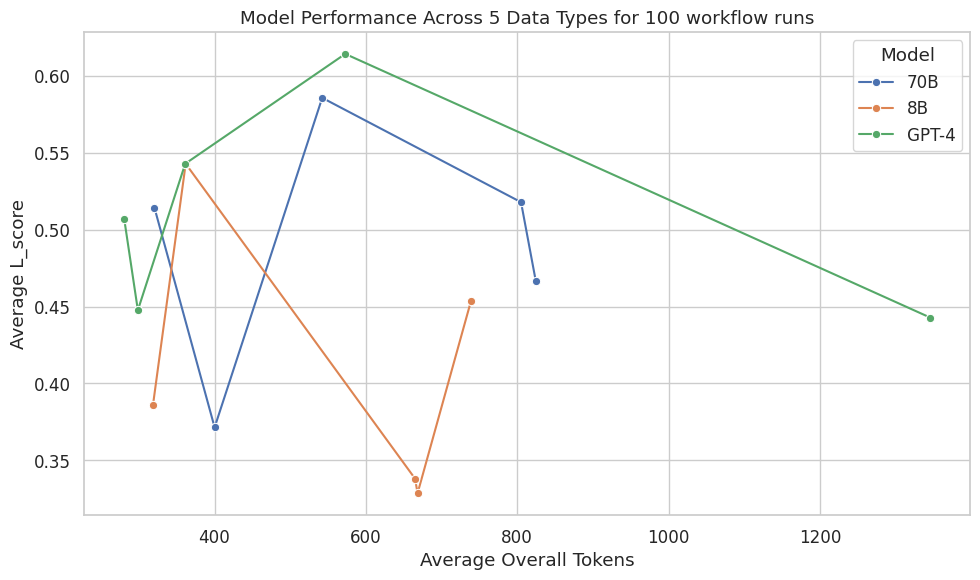

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean up the data_type column (remove OLTP_ or OLAP_)
df['data_type'] = df['data_type'].str.replace(r'^(OLTP_|OLAP_)', '', regex=True)

# Step 2: Extract 'Model' from 'model_config'
df['Model'] = df['Model_Config'].str.split('|').str[0]

# Step 3: Define the 5 target data types
target_types = [
    "DataFlow|ControlFlow",                         # Best
    "Scheduling",                                   # Worst
    "DataFlow|ControlFlow|Scheduling|Telemetry",    # Avg 1
    "Scheduling|Telemetry",                         # Avg 2
    "DataFlow"                                      # Avg 3
]

# Step 4: Filter to only those data types
filtered_df = df[df['data_type'].isin(target_types)].copy()

# Step 5: Group by Model and data_type to get the average L_score and overall_tokens
summary_df = (
    filtered_df
    .groupby(['Model', 'data_type'])[['L_score', 'overall_tokens']]
    .mean()
    .reset_index()
)

# Optional: sort data_type to preserve line order
summary_df['data_type'] = pd.Categorical(
    summary_df['data_type'],
    categories=target_types,
    ordered=True
)
summary_df.sort_values(['Model', 'data_type'], inplace=True)

# Step 6: Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=summary_df,
    x='overall_tokens',
    y='L_score',
    hue='Model',
    marker='o'
)

plt.title('Model Performance Across 5 Data Types for 100 work')
plt.xlabel('Average Overall Tokens')
plt.ylabel('Average L_score')
plt.grid(True)
plt.tight_layout()
plt.show()


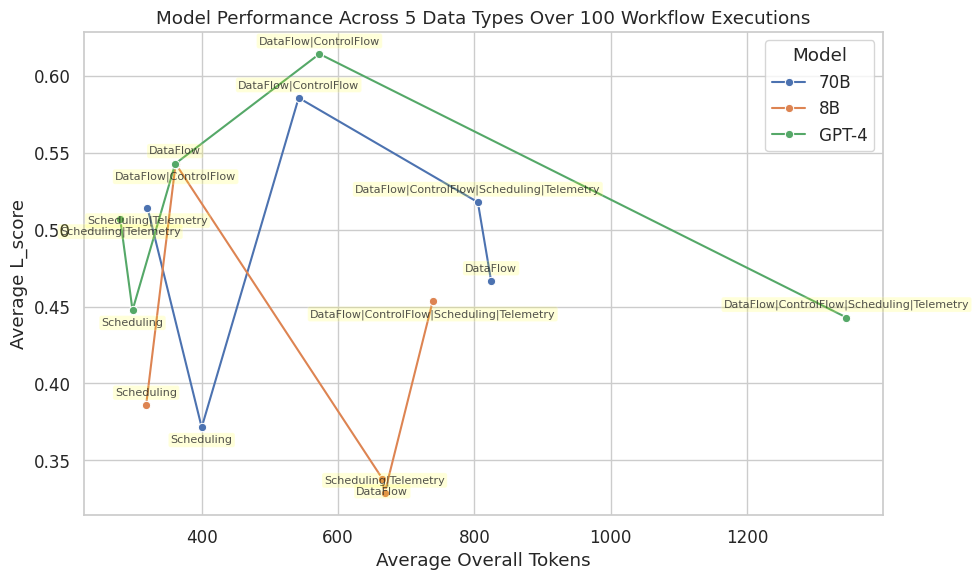

In [91]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=summary_df,
    x='overall_tokens',
    y='L_score',
    hue='Model',
    marker='o'
)

# Sort to alternate label positions (up/down) per data_type
offset_y = 0.005  # vertical offset for labels
for i, (_, row) in enumerate(summary_df.iterrows()):
    # Alternate offset direction (+/-) for better spread
    direction = 1 if i % 2 == 0 else -1
    ax.text(
        row['overall_tokens'], 
        row['L_score'] + direction * offset_y,  # offset vertically
        row['data_type'], 
        fontsize=8, 
        ha='center',  # center horizontally on the point
        va='bottom' if direction > 0 else 'top',
        rotation=0,
        alpha=0.8,
        bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.15)
    )

plt.title('Model Performance Across 5 Data Types Over 100 Workflow Executions')
plt.xlabel('Average Overall Tokens')
plt.ylabel('Average L_score')
plt.grid(True)
plt.tight_layout()
plt.show()


# Did not include zeroshot in these, I can.

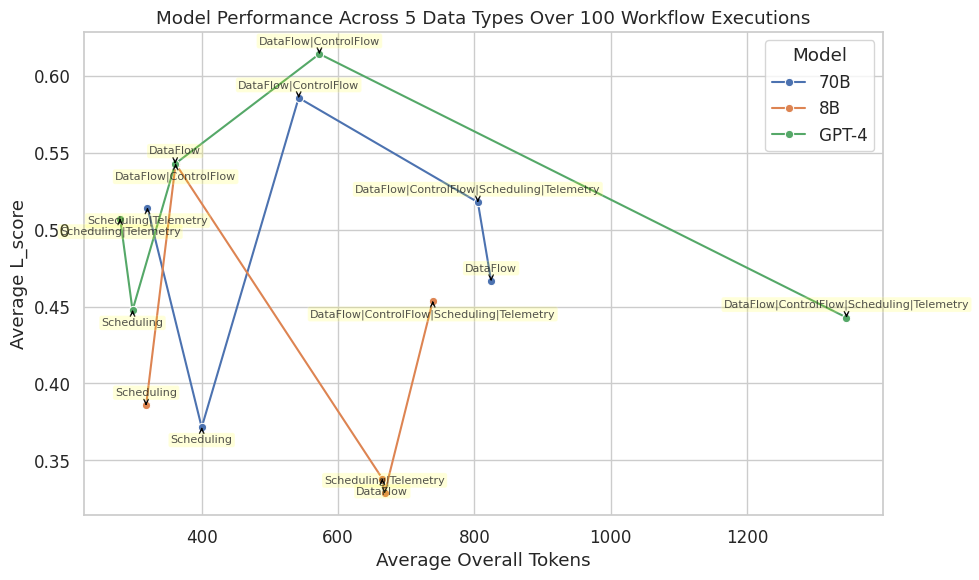

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=summary_df,
    x='overall_tokens',
    y='L_score',
    hue='Model',
    marker='o'
)

offset_y = 0.005  # vertical offset for label position
for i, (_, row) in enumerate(summary_df.iterrows()):
    direction = 1 if i % 2 == 0 else -1
    ax.annotate(
        row['data_type'],
        xy=(row['overall_tokens'], row['L_score']),           # point coordinates
        xytext=(row['overall_tokens'], row['L_score'] + direction * offset_y),  # label position
        ha='center',
        va='bottom' if direction > 0 else 'top',
        fontsize=8,
        alpha=0.8,
        bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.15),
        arrowprops=dict(arrowstyle="->", color='black', lw=1.0)
    )

plt.title('Model Performance Across 5 Data Types Over 100 Workflow Executions')
plt.xlabel('Average Overall Tokens')
plt.ylabel('Average L_score')
plt.grid(True)
plt.tight_layout()
plt.show()


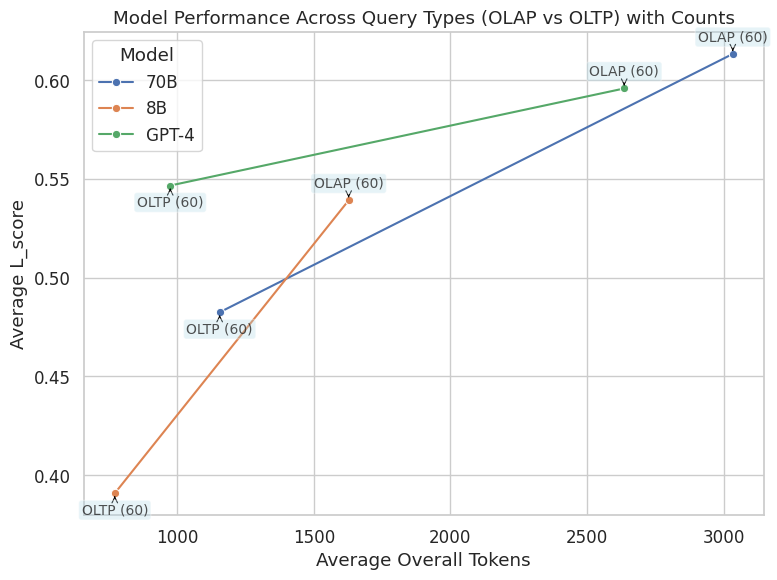

In [108]:
# EXTRACTING MODEL
df['Model'] = df['Model_Config'].str.split('|').str[0]

#'OLAP' and 'OLTP'
target_query_types = ['OLAP', 'OLTP']
filtered_df = df[df['query_type'].isin(target_query_types)].copy()

# GROUPING
summary_qtype = (
    filtered_df
    .groupby(['Model', 'query_type'])
    .agg(
        L_score_mean = ('L_score', 'mean'),
        overall_tokens_mean = ('overall_tokens', 'mean'),
        count = ('L_score', 'size')   # count of rows per group
    )
    .reset_index()
)

# PLOT WITH CONNECTIONS
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=summary_qtype,
    x='overall_tokens_mean',
    y='L_score_mean',
    hue='Model',
    marker='o'
)


# ANNOTATE
offset_y = 0.005
for i, (_, row) in enumerate(summary_qtype.iterrows()):
    direction = 1 if i % 2 == 0 else -1
    label_text = f"{row['query_type']} ({row['count']})"
    ax.annotate(
        label_text,
        xy=(row['overall_tokens_mean'], row['L_score_mean']),
        xytext=(row['overall_tokens_mean'], row['L_score_mean'] + direction * offset_y),
        ha='center',
        va='bottom' if direction > 0 else 'top',
        fontsize=10,
        alpha=0.8,
        bbox=dict(boxstyle="round,pad=0.2", fc="lightblue", alpha=0.3),
        arrowprops=dict(arrowstyle="->", color='black', lw=0.8)
    )

plt.title('Model Performance Across Query Types (OLAP vs OLTP) with Counts')
plt.xlabel('Average Overall Tokens')
plt.ylabel('Average L_score')
plt.grid(True)
plt.tight_layout()
plt.show()


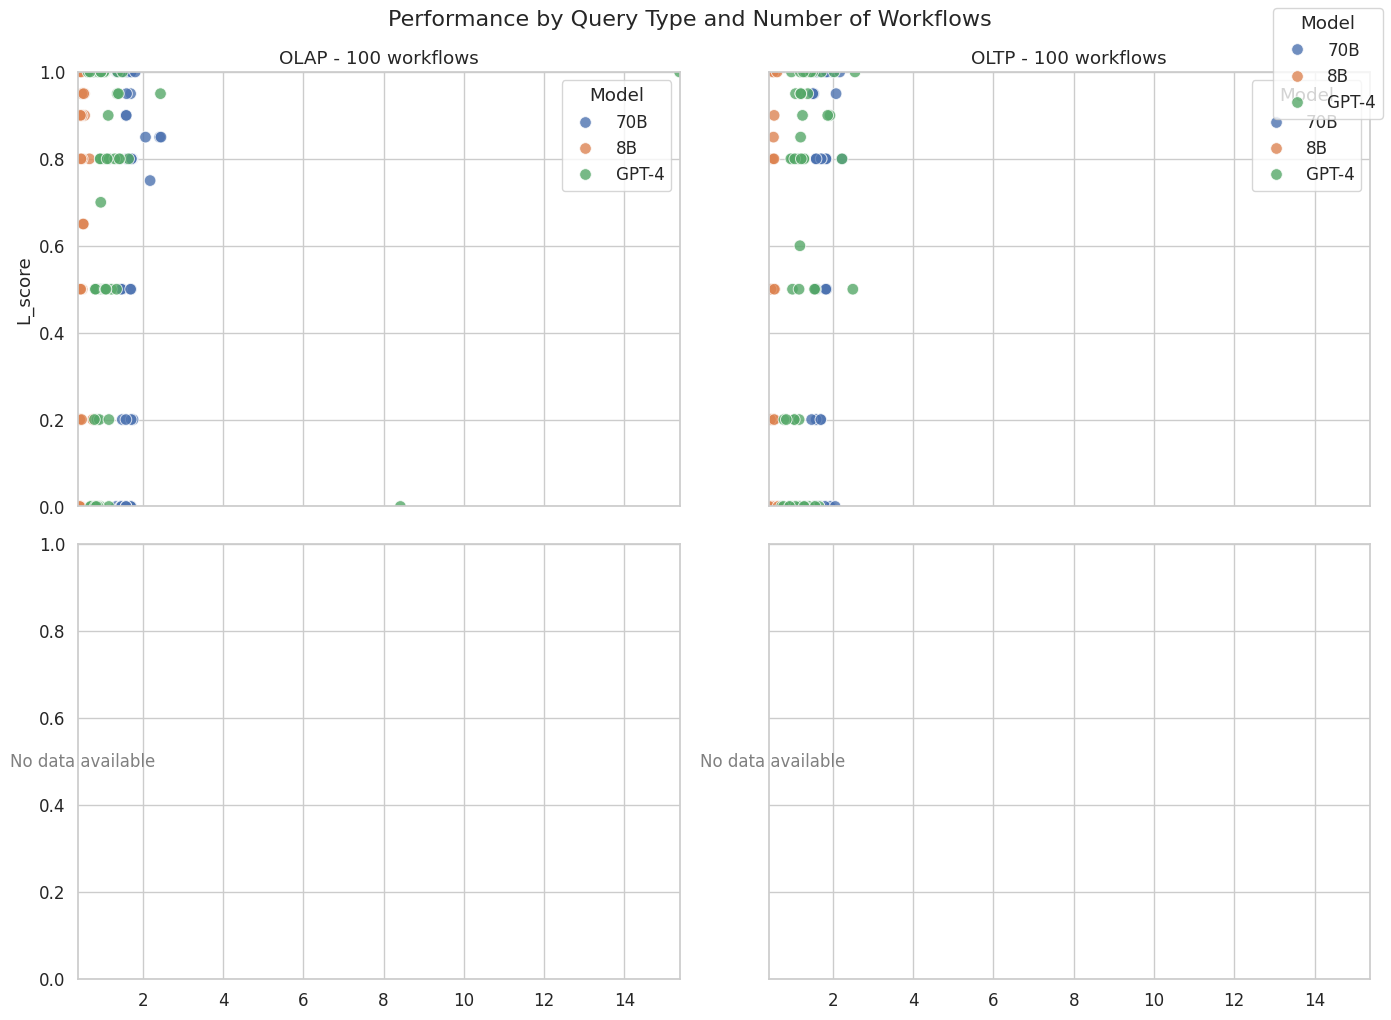

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract Model (first part before '|')
df['Model'] = df['Model_Config'].str.split('|').str[0]

# Extract number of workflows (last part after '|') and convert to int if needed
df['num_workflows'] = df['Model_Config'].str.split('|').str[-1].astype(int)

# Filter to only OLAP and OLTP query types
target_query_types = ['OLAP', 'OLTP']
filtered_df = df[df['query_type'].isin(target_query_types)].copy()

# Setup 2x2 grid plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

# Titles for columns
col_titles = ['100 Workflows', '1 Workflow']
for ax, col_title in zip(axes[0], col_titles):
    ax.set_title(col_title, fontsize=14)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plotting function per subplot
def plot_subplot(ax, workflow_count, query_type):
    data = filtered_df[(filtered_df['num_workflows'] == workflow_count) & (filtered_df['query_type'] == query_type)]
    if data.empty:
        ax.text(0.5, 0.5, 'No data available', ha='center', va='center', fontsize=12, color='gray')
        # Set consistent axis limits for empty plots
        ax.set_xlim(filtered_df['time_taken_seconds'].min(), filtered_df['time_taken_seconds'].max())
        ax.set_ylim(filtered_df['L_score'].min(), filtered_df['L_score'].max())
        return
    sns.scatterplot(
        data=data,
        x='time_taken_seconds',
        y='L_score',
        hue='Model',
        ax=ax,
        s=70,
        alpha=0.8
    )
    ax.set_xlabel('Time Taken (seconds)')
    ax.set_ylabel('L_score')
    ax.set_title(f'{query_type} - {workflow_count} workflows')

# Plot each subplot: rows = OLAP/OLTP, columns = workflows 100/1
plot_subplot(axes[0], 100, 'OLAP')   # Top-left
plot_subplot(axes[1], 100, 'OLTP')   # Bottom-left
plot_subplot(axes[2], 1, 'OLAP')     # Top-right
plot_subplot(axes[3], 1, 'OLTP')     # Bottom-right

# Adjust layout and legend
plt.tight_layout()
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Model')

plt.suptitle('Performance by Query Type and Number of Workflows', fontsize=16, y=1.02)
plt.show()


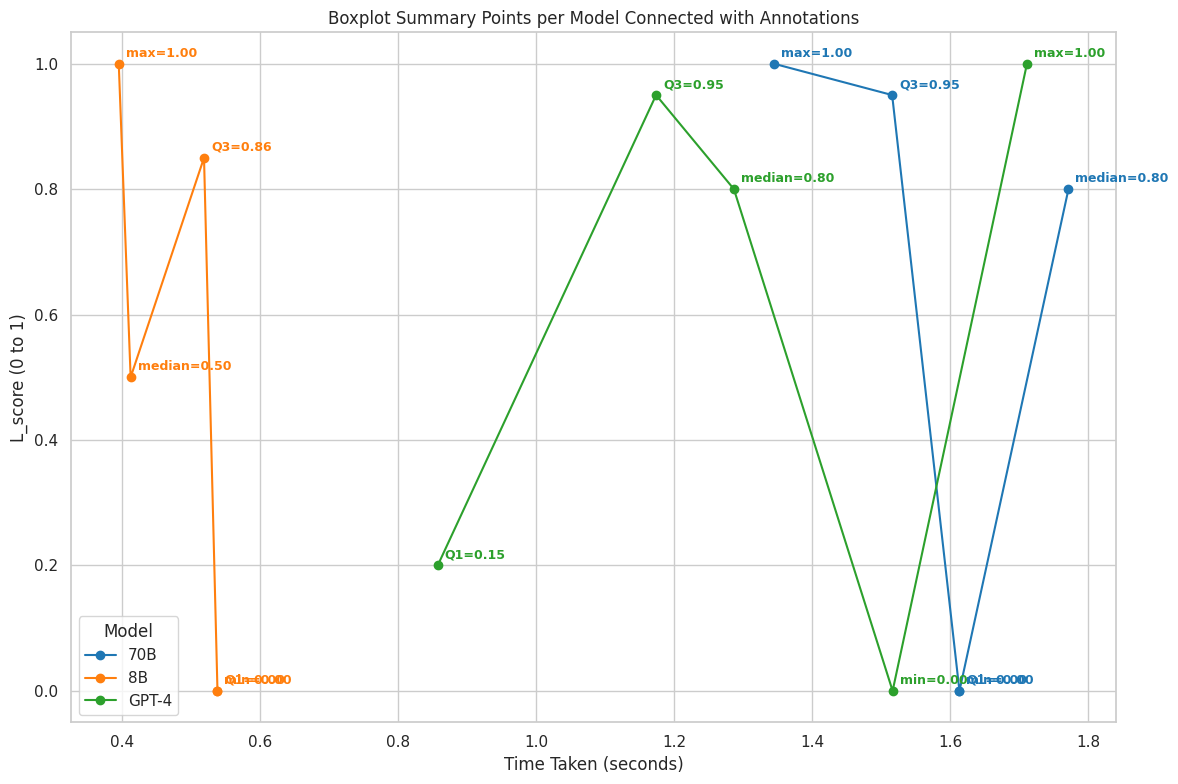

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['Model'] = df['Model_Config'].str.split('|').str[0]
df['L_score_clipped'] = df['L_score'].clip(0, 1)

selected_points = []

for model, group in df.groupby('Model'):
    # Compute boxplot stats
    desc = group['L_score_clipped'].describe(percentiles=[0.25, 0.5, 0.75])
    min_val = desc['min']
    q1 = desc['25%']
    median = desc['50%']
    q3 = desc['75%']
    max_val = desc['max']

    # Function to get closest row to a value
    def closest_point(value):
        idx = (group['L_score_clipped'] - value).abs().idxmin()
        return group.loc[idx]

    # Get actual points closest to these stats
    points = pd.DataFrame([
        closest_point(min_val),
        closest_point(q1),
        closest_point(median),
        closest_point(q3),
        closest_point(max_val),
    ])

    points['stat'] = ['min', 'Q1', 'median', 'Q3', 'max']
    points['stat_val'] = [min_val, q1, median, q3, max_val]

    selected_points.append(points)

selected_df = pd.concat(selected_points).sort_values(['Model', 'time_taken_seconds'])

plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab10", selected_df['Model'].nunique())

for i, (model, group) in enumerate(selected_df.groupby('Model')):
    plt.plot(
        group['time_taken_seconds'], 
        group['L_score_clipped'], 
        label=model, 
        color=palette[i],
        marker='o',
        linestyle='-'
    )
    # Annotate each point with stat name and value
    for _, row in group.iterrows():
        plt.annotate(
            f"{row['stat']}={row['stat_val']:.2f}",
            xy=(row['time_taken_seconds'], row['L_score_clipped']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=9,
            color=palette[i],
            weight='bold'
        )

plt.xlabel('Time Taken (seconds)')
plt.ylabel('L_score (0 to 1)')
plt.title('Boxplot Summary Points per Model Connected with Annotations')
plt.legend(title='Model')
plt.grid(True)
plt.tight_layout()
plt.show()


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt the data to long format
df_melted = df.melt(id_vars='RAG_type', value_vars=['time_taken_seconds', 'L_score', 'tokens'],
                    var_name='Metric', value_name='Value')

# Faceted boxplots
g = sns.catplot(
    data=df_melted,
    x='RAG_type',
    y='Value',
    col='Metric',
    kind='box',
    col_wrap=3,  # Makes it 3 columns wide
    height=4,
    aspect=1
)
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['RAG_type', 'tokens']"

In [120]:
# SPLITTING MODEL_CONFIG
df[['Model', 'Temp', 'RAG_type', 'Workflows']] = df['Model_Config'].str.split('|', expand=True)


In [122]:
# Melt to long format
df_melted = df.melt(
    id_vars='RAG_type',
    value_vars=['time_taken_seconds', 'L_score', 'overall_tokens'],
    var_name='Metric',
    value_name='Value'
)


In [158]:
df.columns

Index(['query_id', 'query', 'expected_code', 'generated_code', 'status',
       'summary_text', 'result_df_text', 'Model_Config', 'summary_tokens',
       'overall_tokens', 'time_taken_seconds', 'full_agent_output', 'L_score',
       'L_reason', 'R_score', 'query_type', 'data_type', 'prov_type', 'error',
       'regex_match_score', 'Model', 'Temp', 'RAG_type', 'Workflows'],
      dtype='object')

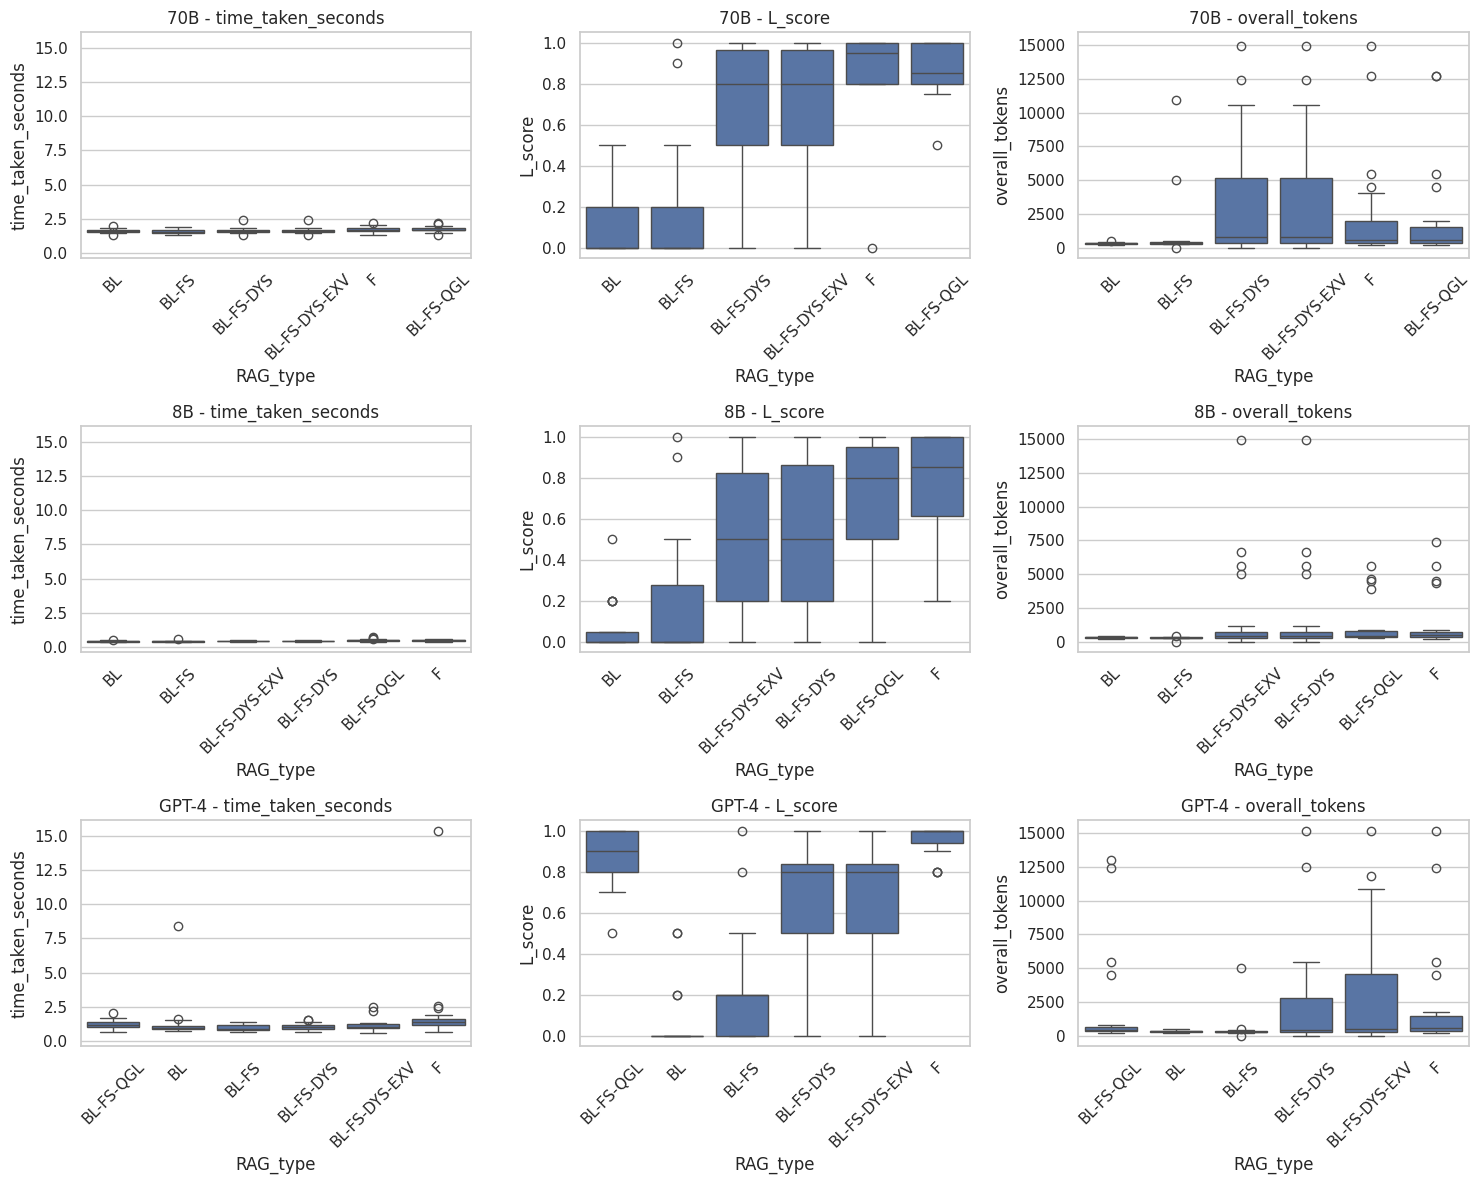

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split Model_Config into useful columns
df[['Model', 'Temp', 'RAG_type', 'Workflows']] = df['Model_Config'].str.split('|', expand=True)

# Unique models and metrics
models = df['Model'].unique()
metrics = ['time_taken_seconds', 'L_score', 'overall_tokens']

fig, axes = plt.subplots(len(models), len(metrics), figsize=(5*len(metrics), 4*len(models)), sharey='col')

for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        ax = axes[i, j] if len(models) > 1 else axes[j]
        subset = df[df['Model'] == model]
        sns.boxplot(data=subset, x='RAG_type', y=metric, ax=ax)
        ax.set_title(f'{model} - {metric}')
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# STARTING FROM HERE

# SPLITTING DATA_TYPE

In [112]:
df = pd.read_csv("combined.csv")
df['data_type'] = df['data_type'].str.split('|')

# Explode the data_type list into rows
df_exploded = df.explode('data_type')

# Remove whitespace from the exploded data_type values
df_exploded['data_type'] = df_exploded['data_type'].str.strip()

# Save exploded DataFrame to CSV
df_exploded.to_csv("splitted_combined.csv", index=False)

# Keep df as the exploded DataFrame for further use
df_split = df_exploded.copy()
# df_split = pd.read_csv('splitted_combined.csv')


In [113]:
def apply_mods(df):
    df[['Model', 'Temp', 'context', 'Workflows']] = df['Model_Config'].str.split('|', expand=True)
    df['data_type'] = df['data_type'].apply(lambda x: '|'.join(sorted(x)) if isinstance(x, list) else x)
    model_label_map = {
        '8B': 'Llama 3-8B',
        '70B': 'Llama 3-70B',
        'GPT': 'GPT-4'
    }
    df['Model'] = df['Model'].map(model_label_map)
    
    return df

In [114]:
df = apply_mods(df)
df_split = apply_mods(df_split)

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df[['Model', 'Temp', 'RAG_type', 'Workflows']] = df['Model_Config'].str.split('|', expand=True)
# Unique models and metrics
models = df['Model'].unique()
# Group and aggregate
grouped = df.groupby(['query_type', 'prov_type', 'Model', 'data_type'])['L_score'].agg(['mean', 'std']).reset_index()


# Without limit

NameError: name 'grouped' is not defined

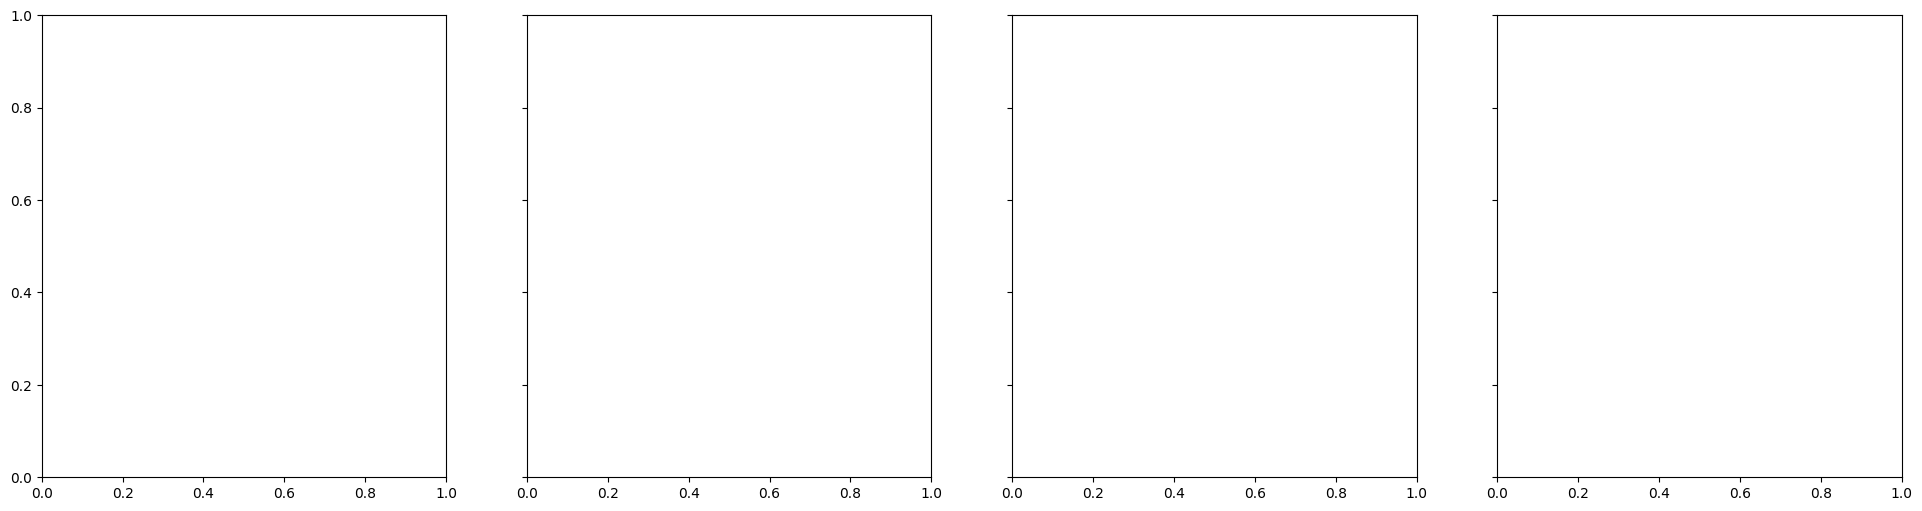

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# CONDITIONS AND TITLES
sections = [
    ('olap', 'retrospective'),
    ('olap', 'prospective'),
    ('oltp', 'retrospective'),
    ('oltp', 'prospective')
]
titles = ['OLAP Retrospective', 'OLAP Prospective', 'OLTP Retrospective', 'OLTP Prospective']

fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

for idx, ((query_type, prov_type), title) in enumerate(zip(sections, titles)):
    ax = axes[idx]
    
    # FILTER
    subset = grouped[
        (grouped['query_type'].str.lower() == query_type) & 
        (grouped['prov_type'].str.lower() == prov_type)
    ]
    
    if subset.empty:
        ax.set_title(f"{title} (No data)")
        ax.axis('off')
        continue
    
    # SORTING BY MODEL THEN DATA_TYPE
    subset = subset.sort_values(['Model', 'data_type'])
    
    # BARPLOTS
    sns.barplot(
        data=subset,
        x='Model',
        y='mean',
        hue='data_type',
        palette='Set2',
        errorbar=None,
        ax=ax
    )
    
    # ERROR STDDEV BARS
    for bar, (_, row) in zip(ax.containers[0], subset.iterrows()):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        std = row['std']
        ax.errorbar(x, y, yerr=std, fmt='none', c='black', capsize=3)
    
    ax.set_title(title)
    ax.set_xlabel("Model")
    if idx == 0:
        ax.set_ylabel("Average L_score")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)

# Put legend outside, centered at top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# ANALYSIS 1

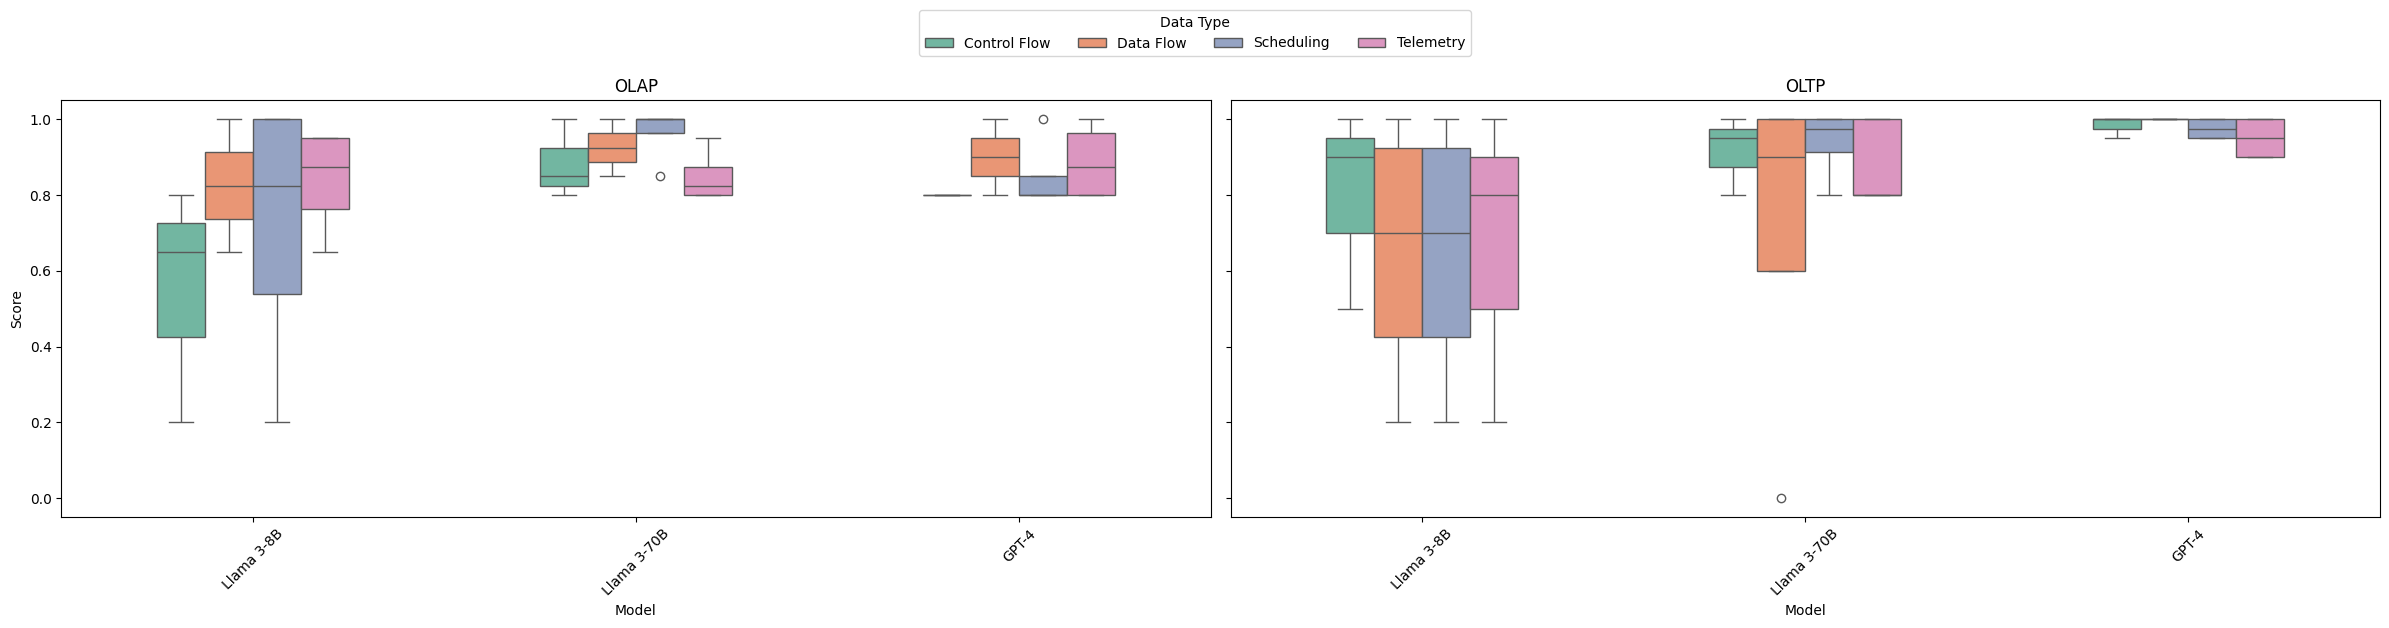

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model order
model_order = ['Llama 3-8B', 'Llama 3-70B', 'GPT-4']

# Sections to plot
sections = [
    ('OLAP', 'Retrospective', 'OLAP'),
    ('OLTP', 'Retrospective', 'OLTP')
]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(24, 6), sharey=True)

for ax, (query_type, prov_type, title) in zip(axes, sections):
    # Filter
    subset = df_split[
        (df_split['query_type'] == query_type) &
        (df_split['context'] == 'F') &
        (df_split['prov_type'] == prov_type)
    ].copy()

    # Fix model capitalization if needed
    subset['Model'] = subset['Model'].replace({
        'LLama 3-8B': 'Llama 3-8B',
        'LLama 3-70B': 'Llama 3-70B',
    })

    # Filter out bad/NaN models and apply correct category order
    subset = subset[subset['Model'].isin(model_order)]
    subset['Model'] = pd.Categorical(subset['Model'], categories=model_order, ordered=True)

    # Rename data_type labels
    subset['data_type'] = subset['data_type'].replace({
        'ControlFlow': 'Control Flow',
        'DataFlow': 'Data Flow'
    })

    # Sort
    subset = subset.sort_values(['Model', 'data_type'])

    # Plot
    sns.boxplot(
        data=subset,
        x='Model',
        y='L_score',
        hue='data_type',
        palette='Set2',
        ax=ax,
        width=0.5
    )

    ax.set_title(title)
    ax.set_xlabel("Model")
    if ax == axes[0]:
        ax.set_ylabel("Score")
    else:
        ax.set_ylabel("")

    ax.tick_params(axis='x', rotation=45)
    ax.legend([], [], frameon=False)  # suppress per-panel legends

# Global legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Data Type', loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.05))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
fig.savefig('f1.pdf')


/tmp/ipykernel_1445/2461055432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Model'] = subset['Model'].replace({


ValueError: cannot reindex on an axis with duplicate labels

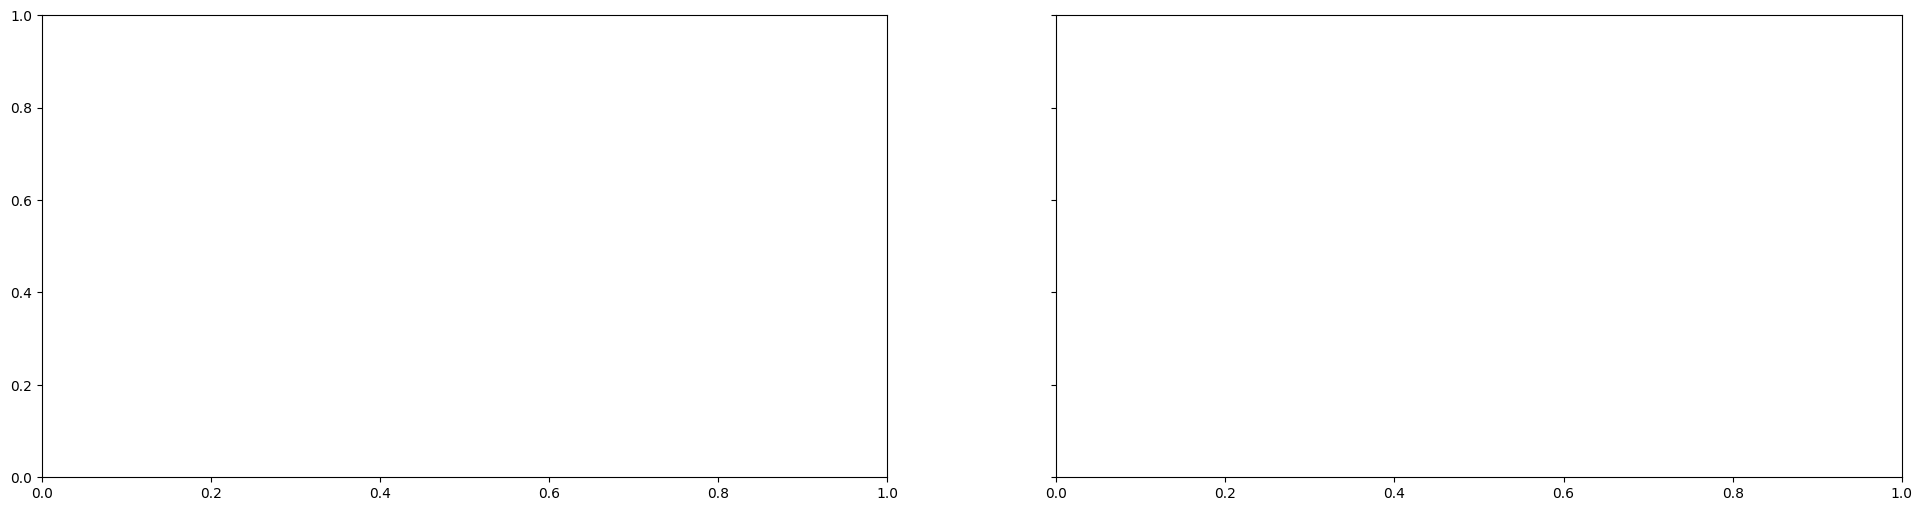

In [52]:
# MODELS AND ORDER
model_order = ['Llama 3-8B', 'Llama 3-70B', 'GPT-4']

# Fix capitalization mismatch
subset['Model'] = subset['Model'].replace({
    'LLama 3-8B': 'Llama 3-8B',
    'LLama 3-70B': 'Llama 3-70B',
})

# Remove rows with NaN in Model
subset = subset[subset['Model'].notna()]

# Set as categorical with correct order
subset['Model'] = pd.Categorical(subset['Model'], categories=model_order, ordered=True)



# SECTIONS OF INTEREST
sections = [
    ('OLAP', 'Retrospective', 'OLAP'),
    ('OLTP', 'Retrospective', 'OLTP')
]

fig, axes = plt.subplots(1, 2, figsize=(24, 6), sharey=True)

for ax, (query_type, prov_type, title) in zip(axes, sections):
    # DATA FILTER
    # subset = grouped[
    #     (grouped['query_type'].str.lower() == query_type) &
    #     (grouped['prov_type'].str.lower() == prov_type)
    # ].copy()

    subset = df_split[
    (df_split['query_type'] == query_type) &
    (df_split['context'] == 'F') &
    (df_split['prov_type'] == prov_type)
].copy()

    # TO FIX LABELS IN LEGEND
    subset['data_type'] = subset['data_type'].replace({
    'ControlFlow': 'Control Flow',
    'DataFlow': 'Data Flow'
})

    # # MODEL MAP
    # subset['model_short'] = subset['Model'].str.split('|').str[0].str.lower()
    # subset['Model'] = subset['model_short'].map(model_label_map)

    # FILTER ONLY MODELS
    # subset = subset[subset['Model'].isin(model_order)]

    # ORDER 
    subset['Model'] = pd.Categorical(subset['Model'], categories=model_order, ordered=True)

    # SORT BY MODEL AND TYPE
    subset = subset.sort_values(['Model', 'data_type'])

    # ALL BARS
    # all_data_types = subset['data_type'].unique()
    # full_index = pd.MultiIndex.from_product([model_order, all_data_types], names=['Model', 'data_type'])
    # subset = subset.set_index(['Model', 'data_type']).reindex(full_index).reset_index()

    sns.boxplot(data=subset, x='Model', y='L_score', hue='data_type', palette='Set2', ax=ax, width = 0.5)
    ax.legend([], [], frameon=False)

    # # ERROR BARS
    # max_val = 1.0
    # for bar, (_, row) in zip(ax.containers[0], subset.iterrows()):
    #     x = bar.get_x() + bar.get_width() / 2
    #     y = bar.get_height()
    #     std = row['std']
    #     yerr = min(std, max_val - y)
    #     ax.errorbar(x, y, yerr=yerr, fmt='none', c='black', capsize=3)

    ax.set_title(title)
    ax.set_xlabel("Model")
    if ax == axes[0]:
        ax.set_ylabel("Score")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)

# LEGEND
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Data Type', loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.05))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
fig.savefig('f1.pdf')


In [57]:
print(df_split['Model'].unique())
print(df_split['Model'].value_counts())


['Llama 3-70B' 'Llama 3-8B' nan]
Model
Llama 3-70B    186
Llama 3-8B     186
Name: count, dtype: int64


In [17]:
# Reason values were over 1.0

# If a bar's mean is 0.95 and the stddev is 0.1, the top of the error bar will be 0.95 + 0.1 = 1.05 
# which is mathematically valid, but it is outside our bounds.

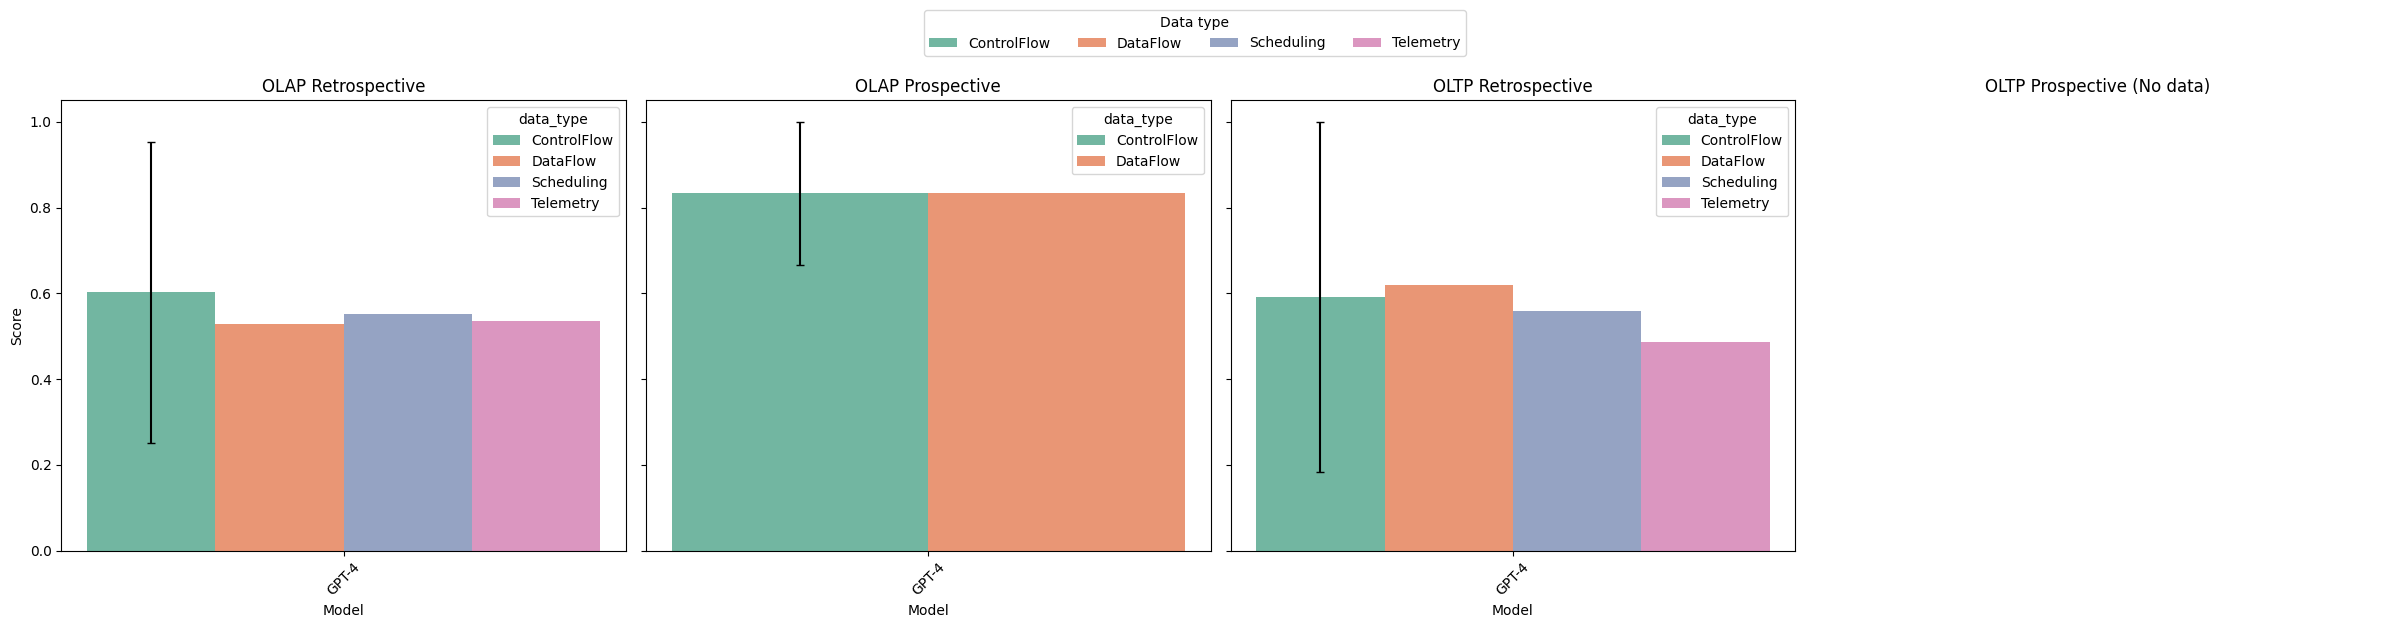

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# CONDITIONS AND TITLES
sections = [
    ('olap', 'retrospective'),
    ('olap', 'prospective'),
    ('oltp', 'retrospective'),
    ('oltp', 'prospective')
]
titles = ['OLAP Retrospective', 'OLAP Prospective', 'OLTP Retrospective', 'OLTP Prospective']

# Desired model order and label mapping
model_order = ['Llama 3-8B', 'Llama 3-70B', 'GPT-4']
model_label_map = {
    'llama-3-8b': 'Llama 3-8B',
    'llama-3-70b': 'Llama 3-70B',
    'gpt-4': 'GPT-4'
}

fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

for idx, ((query_type, prov_type), title) in enumerate(zip(sections, titles)):
    ax = axes[idx]
    
    # FILTER
    subset = grouped[
        (grouped['query_type'].str.lower() == query_type) & 
        (grouped['prov_type'].str.lower() == prov_type)
    ].copy()
    
    if subset.empty:
        ax.set_title(f"{title} (No data)")
        ax.axis('off')
        continue
    
    # Map model names to labels and filter to desired models
    subset['Model'] = subset['Model'].str.lower().map(model_label_map).fillna(subset['Model'])
    subset = subset[subset['Model'].isin(model_order)]
    
    # Set categorical type for x-axis ordering
    subset['Model'] = pd.Categorical(subset['Model'], categories=model_order, ordered=True)
    
    # Sort by Model and data_type for consistent coloring
    subset = subset.sort_values(['Model', 'data_type'])
    
    # BARPLOT with error bars capped at 1.0
    sns.barplot(
        data=subset,
        x='Model',
        y='mean',  # Score column renamed
        hue='data_type',
        palette='Set2',
        errorbar=None,
        ax=ax
    )
    
    max_val = 1.0
    # Add error bars manually, capped at 1.0
    for bar, (_, row) in zip(ax.containers[0], subset.iterrows()):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        std = row['std']
        yerr = min(std, max_val - y)
        ax.errorbar(x, y, yerr=yerr, fmt='none', c='black', capsize=3)
    
    ax.set_title(title)
    ax.set_xlabel("Model")
    if idx == 0:
        ax.set_ylabel("Score")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)

# Legend with updated title "Data type"
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Data type', loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [83]:
print(grouped.columns.tolist())


['query_type', 'prov_type', 'Model', 'data_type', 'mean', 'std']


In [193]:
df = pd.read_csv('splitted_.csv')

# COUNT
query_counts = df.groupby(['prov_type', 'query_type', 'data_type']).size().reset_index(name='count')

# PLOT
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# BARS
sns.barplot(
    data=query_counts,
    x='data_type',
    y='count',
    hue='prov_type',
    palette='pastel',
    edgecolor='black'
)

# PRETTY IT UP
plt.title('Query Set Balance by Provenance Type, Workload Type, and Data Type')
plt.xlabel('Data Type')
plt.ylabel('Number of Queries')
plt.xticks(rotation=45)
plt.legend(title='Provenance Type')

g.set_axis_labels("Data Type", "Number of Queries")
g.set_titles("{col_name} Workload")
g._legend.set_title("Provenance Type")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'splitted_.csv'

# Balance of queries in terms of 'prov_type', 'query_type'(workload_type), and 'data_type' | QUERY SET PLOT

# 2 RAG Influence on score and tokens on combined df not splitted.

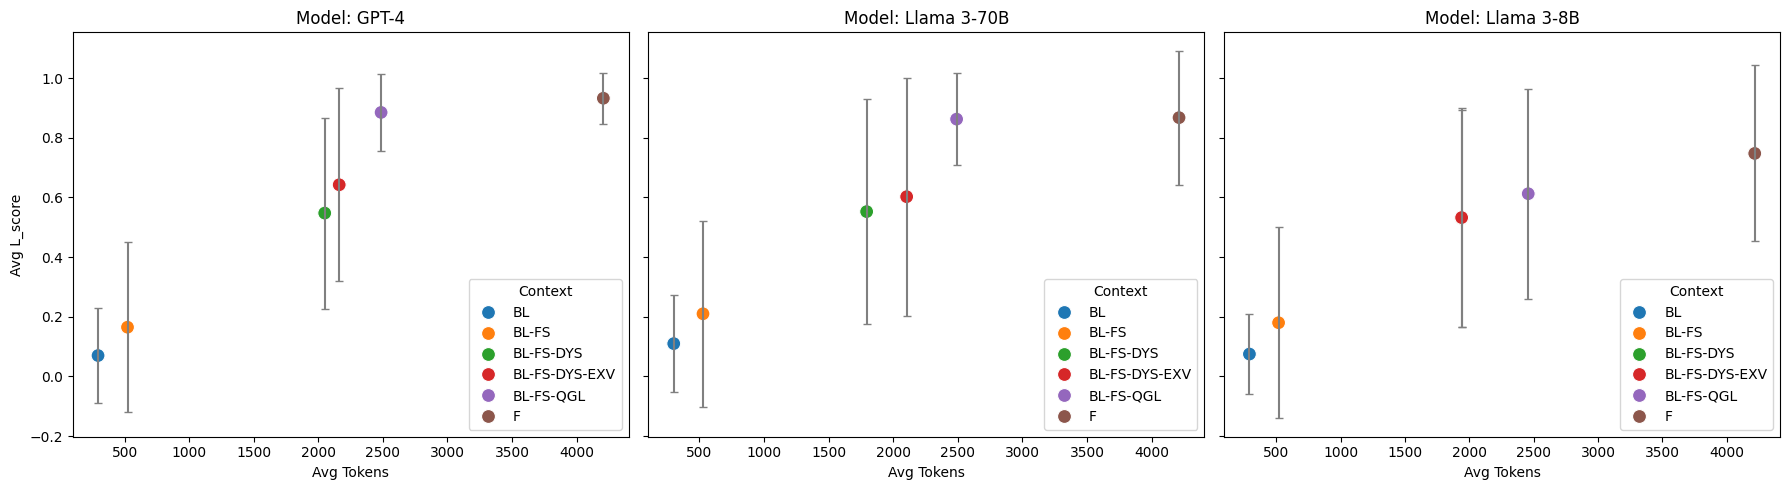

In [115]:
# TESTER
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the data
agg_df = df.groupby(['Model', 'context']).agg({
    'L_score': ['mean', 'std'],
    'overall_tokens': 'mean'
}).reset_index()

# Flatten MultiIndex columns
agg_df.columns = ['Model', 'context', 'L_score_mean', 'L_score_std', 'overall_tokens_mean']

# Set up 1x3 subplot layout
models = agg_df['Model'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, model in enumerate(models):
    ax = axes[i]
    model_df = agg_df[agg_df['Model'] == model]

    # Scatter plot with error bars
    sns.scatterplot(
        data=model_df,
        x='overall_tokens_mean',
        y='L_score_mean',
        hue='context',
        s=100,
        ax=ax
    )

    # Optional: Add std error bars
    ax.errorbar(
        model_df['overall_tokens_mean'],
        model_df['L_score_mean'],
        yerr=model_df['L_score_std'],
        fmt='none',
        c='gray',
        capsize=3
    )

    ax.set_title(f'Model: {model}')
    ax.set_xlabel('Avg Tokens')
    ax.set_ylabel('Avg L_score' if i == 0 else '')
    ax.legend(title='Context', loc='best')

plt.tight_layout()
plt.show()


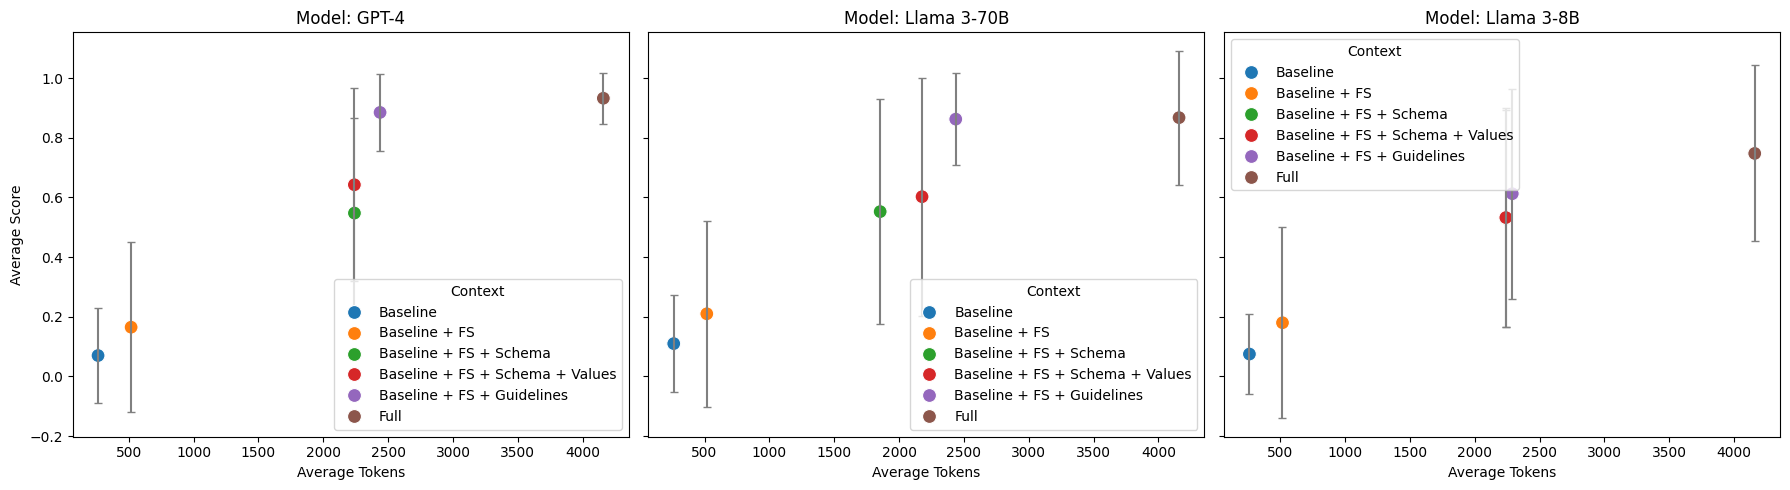

In [116]:
# CORRECT
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['context'] = df['context']
agg_df = df.groupby(['Model', 'context']).agg({
    'L_score': ['mean', 'std'],
    'input_tokens': 'mean'
}).reset_index()
agg_df.columns = ['Model', 'context', 'L_score_mean', 'L_score_std', 'input_tokens_mean']
context_label_map = {
    "BL": "Baseline",
    "BL-FS": "Baseline + FS",
    "BL-FS-DYS": "Baseline + FS + Schema",
    "BL-FS-DYS-EXV": "Baseline + FS + Schema + Values",
    "BL-FS-QGL": "Baseline + FS + Guidelines",
    "F": "Full",
}
agg_df['context'] = agg_df['context'].replace(context_label_map)

# Flatten MultiIndex columns
agg_df.columns = ['Model', 'context', 'L_score_mean', 'L_score_std', 'input_tokens_mean']

# Set up 1x3 subplot layout
models = agg_df['Model'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, model in enumerate(models):
    ax = axes[i]
    model_df = agg_df[agg_df['Model'] == model]

    # Scatter plot with error bars
    sns.scatterplot(
        data=model_df,
        x='input_tokens_mean',
        y='L_score_mean',
        hue='context',
        s=100,
        ax=ax
    )

    # Optional: Add std error bars
    ax.errorbar(
        model_df['input_tokens_mean'],
        model_df['L_score_mean'],
        yerr=model_df['L_score_std'],
        fmt='none',
        c='gray',
        capsize=3
    )

    ax.set_title(f'Model: {model}')
    ax.set_xlabel('Average Tokens')
    ax.set_ylabel('Average Score' if i == 0 else '')
    ax.legend(title='Context', loc='best')

plt.tight_layout()
plt.show()


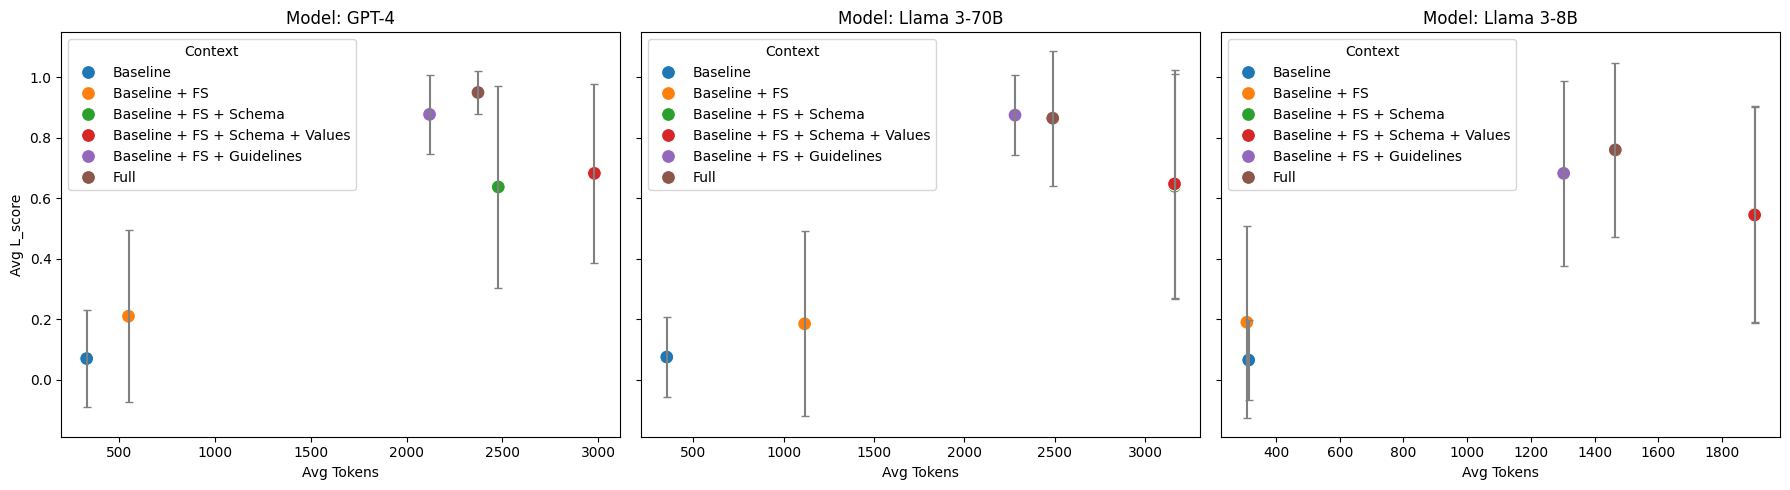

In [13]:
# CORRECT
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['context'] = df['RAG_type']
agg_df = df.groupby(['Model', 'context']).agg({
    'L_score': ['mean', 'std'],
    'overall_tokens': 'mean'
}).reset_index()
agg_df.columns = ['Model', 'context', 'L_score_mean', 'L_score_std', 'overall_tokens_mean']
context_label_map = {
    "BL": "Baseline",
    "BL-FS": "Baseline + FS",
    "BL-FS-DYS": "Baseline + FS + Schema",
    "BL-FS-DYS-EXV": "Baseline + FS + Schema + Values",
    "BL-FS-QGL": "Baseline + FS + Guidelines",
    "F": "Full",
}
agg_df['context'] = agg_df['context'].replace(context_label_map)

# Flatten MultiIndex columns
agg_df.columns = ['Model', 'context', 'L_score_mean', 'L_score_std', 'overall_tokens_mean']

# Set up 1x3 subplot layout
models = agg_df['Model'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, model in enumerate(models):
    ax = axes[i]
    model_df = agg_df[agg_df['Model'] == model]

    # Scatter plot with error bars
    sns.scatterplot(
        data=model_df,
        x='overall_tokens_mean',
        y='L_score_mean',
        hue='context',
        s=100,
        ax=ax
    )

    # Optional: Add std error bars
    ax.errorbar(
        model_df['overall_tokens_mean'],
        model_df['L_score_mean'],
        yerr=model_df['L_score_std'],
        fmt='none',
        c='gray',
        capsize=3
    )

    ax.set_title(f'Model: {model}')
    ax.set_xlabel('Avg Tokens')
    ax.set_ylabel('Avg L_score' if i == 0 else '')
    ax.legend(title='Context', loc='best')

plt.tight_layout()
plt.show()


In [220]:
agg_df.Model.unique()

array(['GPT-4', 'Llama 3-70B', 'Llama 3-8B'], dtype=object)

In [68]:
df.columns

Index(['query_id', 'query', 'expected_code', 'generated_code', 'status',
       'result_df_text', 'Model_Config', 'overall_tokens',
       'time_taken_seconds', 'full_agent_output', 'L_score', 'L_reason',
       'R_score', 'input_tokens', 'output_tokens', 'query_type', 'data_type',
       'prov_type', 'error', 'regex_match_score', 'summary_text',
       'summary_tokens', 'Model', 'Temp', 'RAG_type', 'Workflows', 'context'],
      dtype='object')

In [69]:
df.context.unique()

array(['BL', 'BL-FS', 'BL-FS-DYS-EXV', 'BL-FS-DYS', 'BL-FS-QGL', 'F'],
      dtype=object)

In [117]:
df[(df['Model'] == 'Llama 3-70B') & (df['context'] == 'BL-FS-DYS')]['overall_tokens'].mean()


np.float64(1794.25)

In [118]:
df[(df['Model'] == 'Llama 3-70B') & (df['context'] == 'BL-FS-DYS-EXV')]['overall_tokens'].mean()


np.float64(2104.0)

In [67]:
df

,query_id,query,expected_code,generated_code,status,result_df_text,Model_Config,overall_tokens,time_taken_seconds,full_agent_output,...,prov_type,error,regex_match_score,summary_text,summary_tokens,Model,Temp,RAG_type,Workflows,context
0,1,"For each workflow execution, for each hostname...","result = df.groupby(['workflow_id', 'hostname'...","result = df.groupby(['workflow_execution_id', ...",405,NaN,70B|HC|BL|100,299,1.6449,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,Retrospective,Exception during execution: 'workflow_executio...,NaN,NaN,NaN,Llama 3-70B,HC,BL,100,BL
1,2,For each activity in the last workflow execute...,result = df[df.workflow_id == df.loc[df.ended_...,result = df[df['workflow_id'] == df['workflow_...,405,NaN,70B|HC|BL|100,299,1.6049,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,Retrospective,Exception during execution: 'Column not found:...,NaN,NaN,NaN,Llama 3-70B,HC,BL,100,BL
2,3,What is the execution time per task in the fir...,result = df[df.workflow_id == df.loc[df.starte...,result = df[(df['workflow_execution_id'] == df...,405,NaN,70B|HC|BL|100,319,1.8524,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,Retrospective,Exception during execution: 'workflow_executio...,NaN,NaN,NaN,Llama 3-70B,HC,BL,100,BL
3,4,What is the duration of each workflow execution?,result=df.groupby('workflow_id').agg(first=('s...,result = df.groupby('workflow_id')['timestamp'...,405,NaN,70B|HC|BL|100,294,2.6218,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,Retrospective,Exception during execution: 'Column not found:...,NaN,NaN,NaN,Llama 3-70B,HC,BL,100,BL
4,5,What is the longest workflow execution?,result = df.groupby('workflow_id').agg(first=(...,result = df.groupby('workflow_id')['end_time']...,405,NaN,70B|HC|BL|100,279,1.4835,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,Retrospective,Exception during execution: 'Column not found:...,NaN,NaN,NaN,Llama 3-70B,HC,BL,100,BL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,16,"For each workflow, what is the order the activ...","result = df.groupby(['workflow_id', 'activity_...","result = df.sort_values(by=['workflow_id', 'st...",301,NaN,70B|HC|F|100,4212,1.7355,"{\n ""code"": 301,\n ""result"": {\n ""result_...",...,Retrospective,NaN,0.75,NaN,NaN,Llama 3-70B,HC,F,100,F
116,17,Which node executed the most tasks in the late...,result = df[df['workflow_id'] == df[df.started...,result = df[df.workflow_id == df.loc[df.ended_...,301,NaN,70B|HC|F|100,4201,1.6272,"{\n ""code"": 301,\n ""result"": {\n ""result_...",...,Retrospective,Result is not a DataFrame,NaN,NaN,NaN,Llama 3-70B,HC,F,100,F
117,18,"In the last 5 workflow executions, what is the...",result = df[df.workflow_id.isin(df.groupby('wo...,result = df.loc[df.groupby('workflow_id')['end...,405,NaN,70B|HC|F|100,4232,2.0113,"{\n ""code"": 405,\n ""result"": ""Failed to pars...",...,Retrospective,Exception during execution: Cannot use method ...,NaN,NaN,NaN,Llama 3-70B,HC,F,100,F
118,19,List all workflows that took longer than 0.01 ...,result = df.groupby('workflow_id').filter(lamb...,result = df.groupby('workflow_id').apply(lambd...,301,NaN,70B|HC|F|100,4225,2.9073,"{\n ""code"": 301,\n ""result"": {\n ""result_...",...,Retrospective,Exception during execution: unsupported operan...,NaN,NaN,NaN,Llama 3-70B,HC,F,100,F


In [65]:
print(df.columns)

Index(['query_id', 'query', 'expected_code', 'generated_code', 'status',
       'result_df_text', 'Model_Config', 'overall_tokens',
       'time_taken_seconds', 'full_agent_output', 'L_score', 'L_reason',
       'R_score', 'input_tokens', 'output_tokens', 'query_type', 'data_type',
       'prov_type', 'error', 'regex_match_score', 'summary_text',
       'summary_tokens', 'Model', 'Temp', 'RAG_type', 'Workflows', 'context'],
      dtype='object')


In [ ]:
df[']

# 3 Impact of RAG types in different data types on splitted combined FOCUS ON GPT

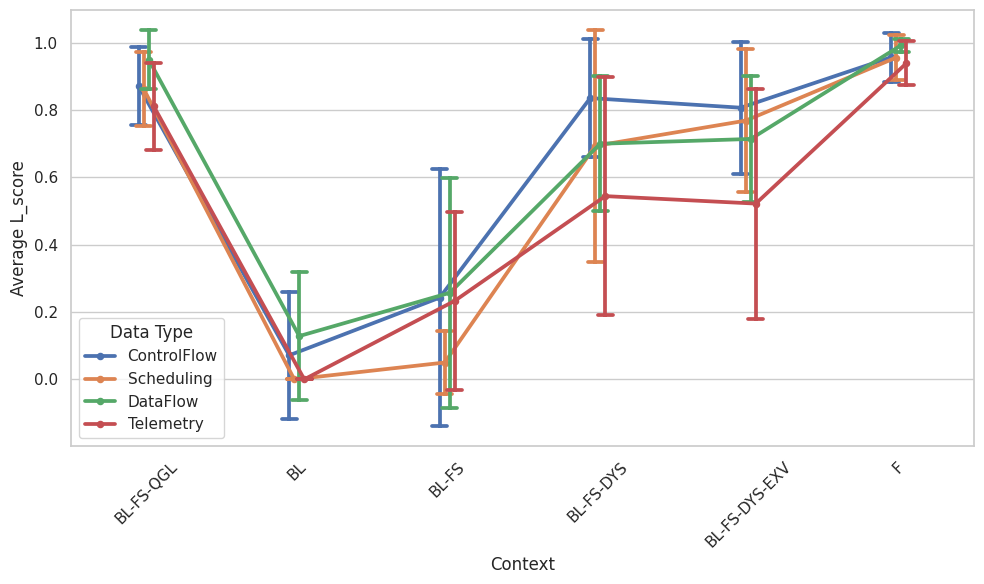

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter for GPT-4
gpt_df = df_split[df_split['Model'] == 'GPT-4']

# Set up the figure
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the pointplot
sns.pointplot(
    data=gpt_df,
    x='RAG_type',
    y='L_score',
    hue='data_type',
    errorbar='sd',        # Use standard deviation as error bars
    dodge=True,
    markers='.',
    capsize=0.1
)

# Customize
#plt.title("GPT-4: L_score Across RAG Types by Data Type")
plt.xlabel("Context")
plt.ylabel("Average L_score")
plt.legend(title="Data Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [165]:
df.columns

Index(['query_id', 'query', 'expected_code', 'generated_code', 'status',
       'summary_text', 'result_df_text', 'Model_Config', 'summary_tokens',
       'overall_tokens', 'time_taken_seconds', 'full_agent_output', 'L_score',
       'L_reason', 'R_score', 'query_type', 'data_type', 'prov_type', 'error',
       'regex_match_score', 'Model', 'Temp', 'RAG_type', 'Workflows'],
      dtype='object')

# COUNT OF OLAP PROSPECTIVE QUERIES

In [184]:
# FILTER
olap_prosp = df_split[
    (df_split['query_type'] == 'OLAP') &
    (df_split['prov_type'] == 'Prospective') &
    (df_split['RAG_type'] == 'F')
]
# COUNTS THEM
num_queries = olap_prosp.shape[0]
print(f"OLAP PROSPECTIVE QUERIES: {num_queries}")
# IF 'L_score' = 1.0 FOR ALL OF THEM
all_perfect = (olap_prosp['L_score'] == 1.0).all()
print(f"ARE ALL L_SCORES 1.0: {all_perfect}")

OLAP PROSPECTIVE QUERIES: 6
ARE ALL L_SCORES 1.0: True
